In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
from utils import data_loader_utils
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsfresh import extract_features
from tsfresh import select_features
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, roc_auc_score
from tsfresh import select_features, extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction.feature_calculators import (skewness, kurtosis, minimum, maximum, standard_deviation, approximate_entropy)
from tsfresh.feature_extraction import MinimalFCParameters


In [6]:
machines = ["M01","M02","M03"]
process_names = ["OP00","OP01","OP02","OP03","OP04","OP05","OP06","OP07","OP08","OP09","OP10","OP11","OP12","OP13","OP14"]
labels = ["good","bad"]
path_to_dataset = "./data/"

In [7]:
X_data = []
y_data = []
for process_name in process_names:
    for machine in machines:
        for label in labels:
            data_path = os.path.join(path_to_dataset, machine, process_name, label)
            data_list, data_label = data_loader_utils.load_tool_research_data(data_path, add_additional_label=False, label=label)
            #concatenating
            X_data.extend(data_list)
            y_data.extend(data_label)

laoding files from ./data/M01/OP00/good... 
laoding files from ./data/M01/OP00/bad... 
laoding files from ./data/M02/OP00/good... 
laoding files from ./data/M02/OP00/bad... 
laoding files from ./data/M03/OP00/good... 
laoding files from ./data/M03/OP00/bad... 
laoding files from ./data/M01/OP01/good... 
laoding files from ./data/M01/OP01/bad... 
laoding files from ./data/M02/OP01/good... 
laoding files from ./data/M02/OP01/bad... 
laoding files from ./data/M03/OP01/good... 
laoding files from ./data/M03/OP01/bad... 
laoding files from ./data/M01/OP02/good... 
laoding files from ./data/M01/OP02/bad... 
laoding files from ./data/M02/OP02/good... 
laoding files from ./data/M02/OP02/bad... 
laoding files from ./data/M03/OP02/good... 
laoding files from ./data/M03/OP02/bad... 
laoding files from ./data/M01/OP03/good... 
laoding files from ./data/M01/OP03/bad... 
laoding files from ./data/M02/OP03/good... 
laoding files from ./data/M02/OP03/bad... 
laoding files from ./data/M03/OP03/good... 

In [9]:
data_label

[]

In [10]:
good_X_data = []
good_y_data = []
bad_X_data = []
bad_y_data = []

for i, label in enumerate(y_data):
    if label == "good":
        good_X_data.append(X_data[i])
        good_y_data.append(label)
    elif label == "bad":
        bad_X_data.append(X_data[i])
        bad_y_data.append(label)
    else:
        # Handle other labels if necessary
        pass


In [11]:
bad_X_data

[array([[  -99,  -493, -1015],
        [  -56,    46, -1046],
        [  -56,    58,  -972],
        ...,
        [   11,     5, -1034],
        [   15,    -3, -1036],
        [    0,    21, -1030]]),
 array([[-2.650e+02, -2.300e+02, -1.056e+03],
        [-4.200e+01, -3.200e+02, -8.700e+02],
        [-5.800e+01, -7.600e+01, -8.020e+02],
        ...,
        [-2.300e+01,  2.630e+02, -9.790e+02],
        [ 1.000e+00, -8.000e+01, -1.036e+03],
        [-3.100e+01, -1.320e+02, -8.040e+02]], dtype=float32),
 array([[ 0.000e+00, -8.100e+01, -1.079e+03],
        [-4.400e+01,  7.400e+01, -1.054e+03],
        [-1.000e+00,  1.700e+01, -1.065e+03],
        ...,
        [ 1.890e+02, -1.520e+02, -1.190e+03],
        [ 2.790e+02, -4.480e+02, -9.170e+02],
        [ 1.730e+02, -4.660e+02, -8.230e+02]], dtype=float32),
 array([[   54.,   210., -1153.],
        [  121.,   204., -1057.],
        [  -97.,  -115.,  -868.],
        ...,
        [   11.,  -121.,  -853.],
        [   95.,  -167.,  -921.],
    

In [12]:

# Load the HDF5 file
data_file = './data/M01/OP01/good/M01_Feb_2019_OP01_000.h5'  # Replace with the actual file path

with h5py.File(data_file, 'r') as file:
    # Extract the vibration data
    vibration_data = file['vibration_data'][:]

# Create a Pandas DataFrame with separate columns for X, Y, and Z
vibration_df = pd.DataFrame({'X': vibration_data[:, 0], 'Y': vibration_data[:, 1], 'Z': vibration_data[:, 2]})
time = len(vibration_df)/2000
# Display the first few rows of the DataFrame
print(vibration_df, time)

          X     Y       Z
0       9.0  27.0 -1036.0
1       9.0  17.0 -1040.0
2       5.0  23.0 -1036.0
3       5.0  29.0 -1038.0
4      11.0  27.0 -1028.0
...     ...   ...     ...
58795  23.0  17.0 -1048.0
58796  11.0  50.0 -1046.0
58797  19.0  23.0 -1042.0
58798  31.0  42.0 -1042.0
58799  17.0  35.0 -1050.0

[58800 rows x 3 columns] 29.4


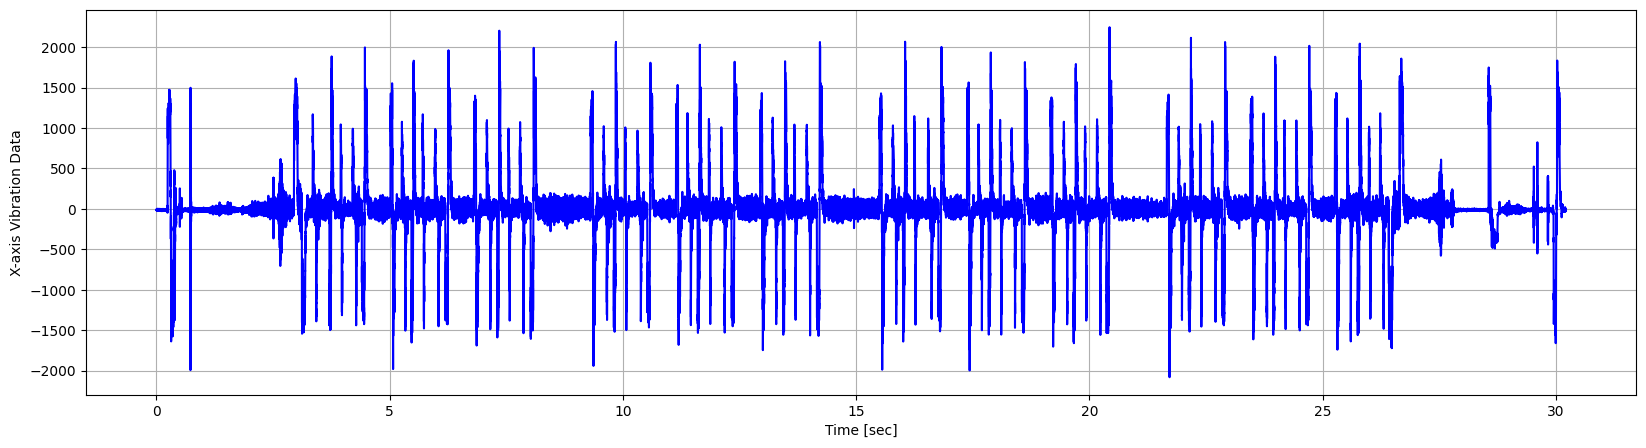

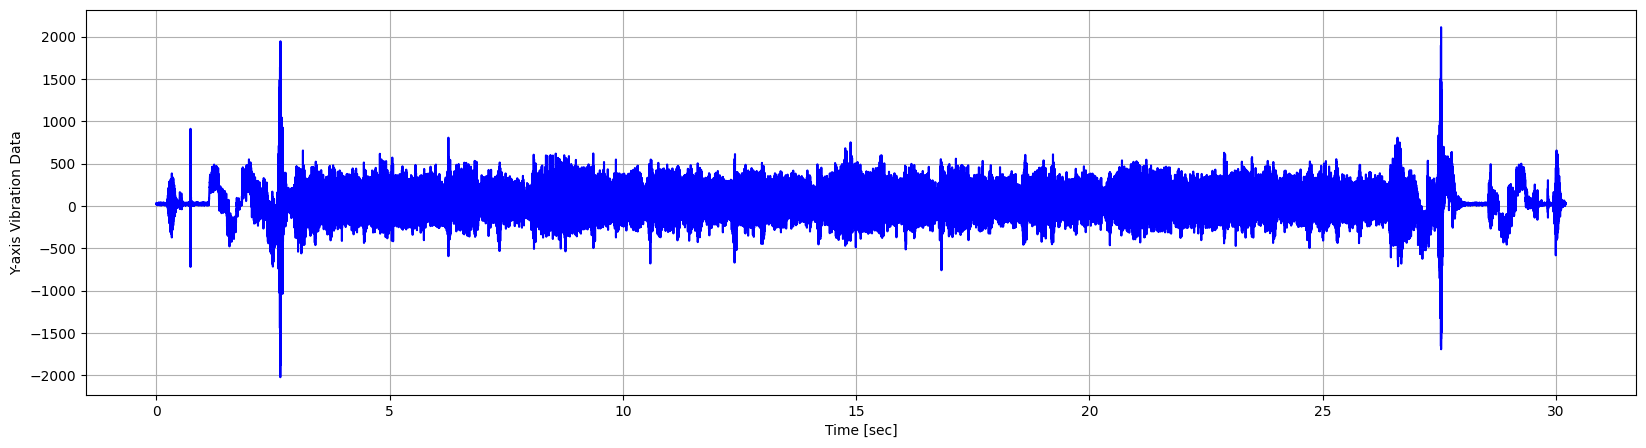

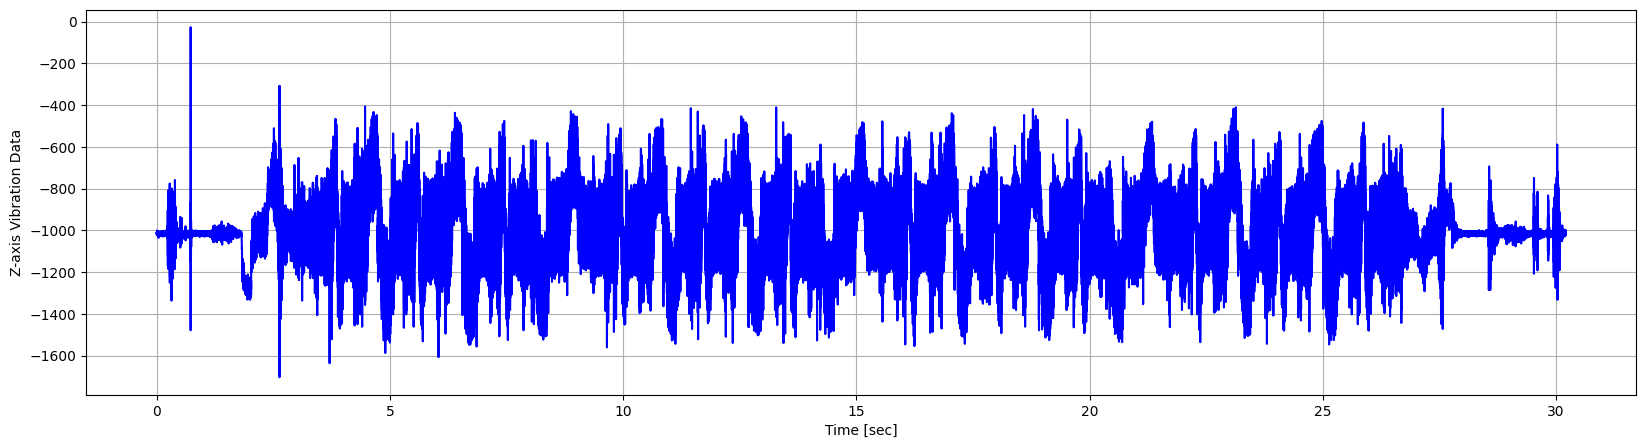

In [13]:


file="./data/M01/OP01/good/M01_Aug_2019_OP01_000.h5"
sample = data_loader_utils.datafile_read(file)

In [14]:
! python --version

/bin/bash: line 1: python: command not found


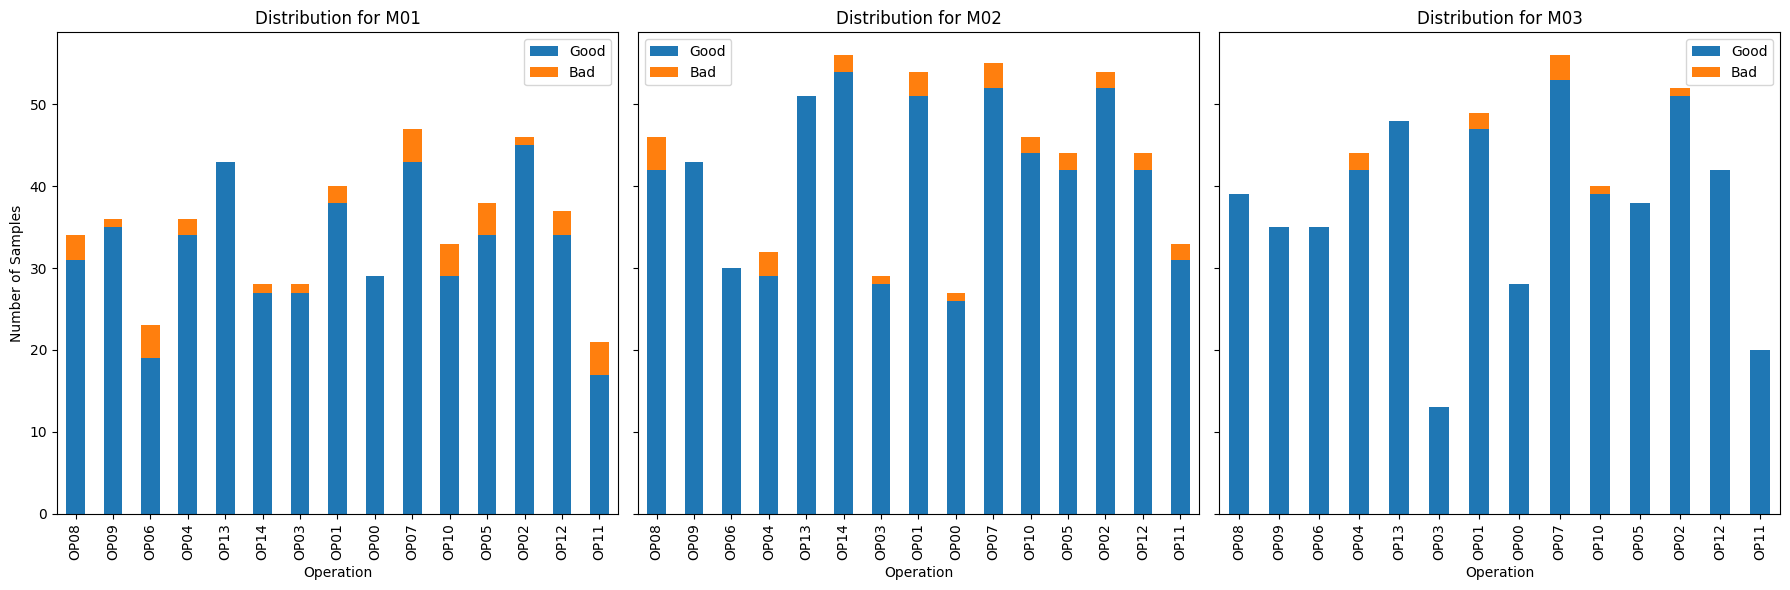

In [15]:


# Define the root directory where your data is stored
data_root = "./data/"


# Initialize counters
machine_operation_counts = []

# Iterate through the directory structure
for machine in ['M01', 'M02', 'M03']:
    for operation in os.listdir(os.path.join(data_root, machine)):
        if os.path.isdir(os.path.join(data_root, machine, operation)):
            good_count = len([file for file in os.listdir(os.path.join(data_root, machine, operation, 'good')) if file.endswith('.h5')])

            # Check if the 'bad' directory exists
            bad_directory = os.path.join(data_root, machine, operation, 'bad')
            if os.path.exists(bad_directory):
                bad_count = len([file for file in os.listdir(bad_directory) if file.endswith('.h5')])
            else:
                bad_count = 0

            machine_operation_counts.append({
                'Machine': machine,
                'Operation': operation,
                'Good': good_count,
                'Bad': bad_count
            })

# Convert the counts to a DataFrame for visualization
df = pd.DataFrame(machine_operation_counts)

# Create three separate subplots
machines = df['Machine'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, machine in enumerate(machines):
    subset = df[df['Machine'] == machine]
    ax = subset.set_index('Operation')[['Good', 'Bad']].plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    ax.set_xlabel('Operation')
    ax.set_ylabel('Number of Samples')
    ax.set_title(f'Distribution for {machine}')
    ax.legend()

# Adjust the layout
plt.tight_layout()
plt.show()


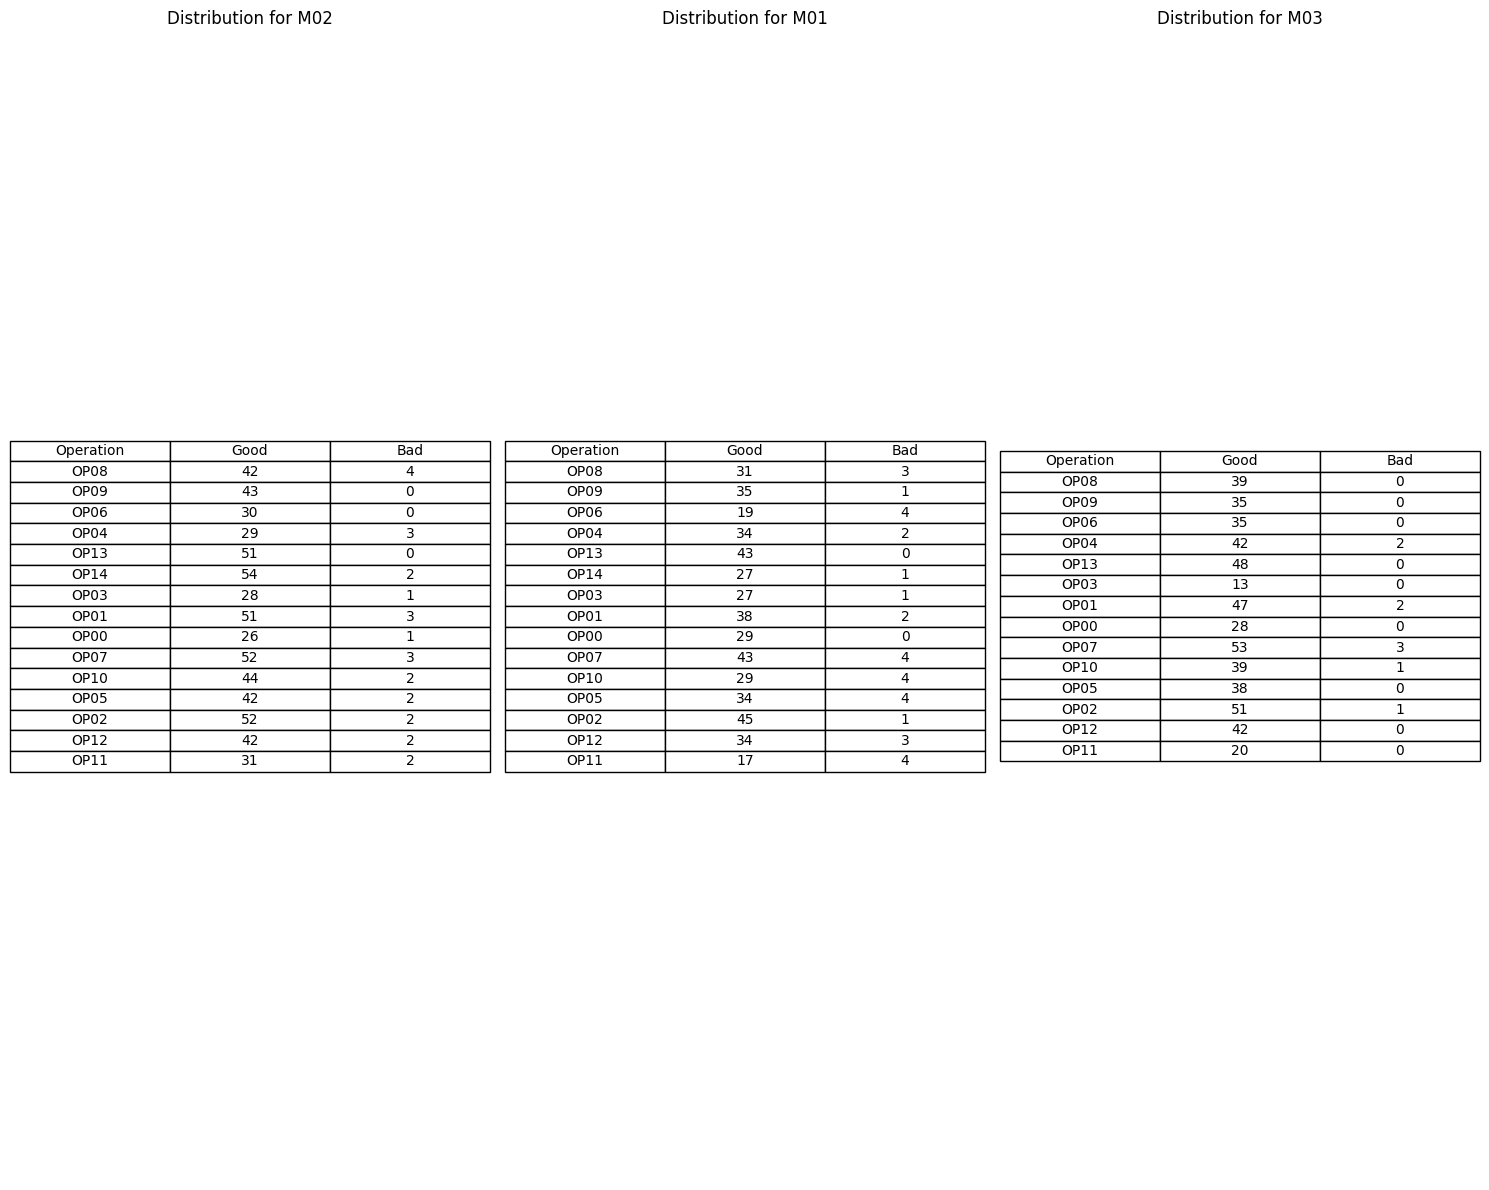

In [16]:


# Define the root directory where your data is stored
data_root = "./data/"



# Initialize counters
machine_operation_counts = []

# Iterate through the directory structure
for machine in ['M01', 'M02', 'M03']:
    for operation in os.listdir(os.path.join(data_root, machine)):
        if os.path.isdir(os.path.join(data_root, machine, operation)):
            good_count = len([file for file in os.listdir(os.path.join(data_root, machine, operation, 'good')) if file.endswith('.h5')])

            # Check if the 'bad' directory exists
            bad_directory = os.path.join(data_root, machine, operation, 'bad')
            if os.path.exists(bad_directory):
                bad_count = len([file for file in os.listdir(bad_directory) if file.endswith('.h5')])
            else:
                bad_count = 0

            machine_operation_counts.append({
                'Machine': machine,
                'Operation': operation,
                'Good': good_count,
                'Bad': bad_count
            })

# Convert the counts to a DataFrame for visualization
df = pd.DataFrame(machine_operation_counts)

# Sort the DataFrame by 'Operation'
df_sorted = df.sort_values(by='Operation')

# Get unique machine values
machines = df_sorted['Machine'].unique()



# Create three separate tables
fig, axes = plt.subplots(1, 3, figsize=(15, 12))


for i, machine in enumerate(machines):
    subset = df[df['Machine'] == machine]
    table_data = subset[['Operation', 'Good', 'Bad']]
    ax = axes[i]
    ax.axis('off')
    
    table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
    ax.set_title(f'Distribution for {machine}')

# Adjust the layout
plt.tight_layout()
plt.show()



In [17]:

# Define the root directory where your data is stored
data_root = "./data/"

def find_all_h5s_in_dir(s_dir):
    """
    list all .h5 files in a directory
    """

    fileslist = []
    for root, dirs, files in os.walk(s_dir):
        for file in files:
            if file.endswith(".h5"):
                fileslist.append(file)
    return fileslist


# Define a function to load H5 files and calculate the duration in seconds
def load_h5_files_and_calculate_duration(data_root):
    data_list = []
    labels = []

    for machine in ['M01', 'M02', 'M03']:
        for operation in os.listdir(os.path.join(data_root, machine)):
            if os.path.isdir(os.path.join(data_root, machine, operation)):
                for label in ['good', 'bad']:
                    data_path = os.path.join(data_root, machine, operation, label)
                    files = find_all_h5s_in_dir(data_path)

                    for file in files:
                        file_path = os.path.join(data_path, file)
                        with h5py.File(file_path, 'r') as f:
                            vibration_data = f['vibration_data'][:]
                            samples_s = len(vibration_data) / 2000  # Assuming a data sampling frequency of 2000 Hz

                        data_list.append({
                            'Machine': machine,
                            'Operation': operation,
                            'Sample Type': label,
                            'File Name': file,
                            'Duration (s)': samples_s
                        })

    return data_list

# Create a DataFrame
data_list = load_h5_files_and_calculate_duration(data_root)
df = pd.DataFrame(data_list)

# Print the DataFrame
print(df)



     Machine Operation Sample Type                 File Name  Duration (s)
0        M01      OP08        good  M01_Aug_2019_OP08_005.h5        38.400
1        M01      OP08        good  M01_Feb_2020_OP08_002.h5        39.424
2        M01      OP08        good  M01_Feb_2021_OP08_005.h5        38.400
3        M01      OP08        good  M01_Feb_2021_OP08_008.h5        38.912
4        M01      OP08        good  M01_Feb_2019_OP08_000.h5        37.800
...      ...       ...         ...                       ...           ...
1697     M03      OP11        good  M03_Aug_2019_OP11_007.h5        59.392
1698     M03      OP11        good  M03_Aug_2019_OP11_004.h5        58.368
1699     M03      OP11        good  M03_Aug_2019_OP11_003.h5        58.880
1700     M03      OP11        good  M03_Aug_2019_OP11_016.h5        58.880
1701     M03      OP11        good  M03_Aug_2019_OP11_013.h5        58.368

[1702 rows x 5 columns]


In [18]:
csv_filename = 'dataset_info.csv'
df.to_csv(csv_filename, index=False)

# Print a message to confirm the file has been saved
print(f"DataFrame saved to {csv_filename}")

DataFrame saved to dataset_info.csv


In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def datafile_read(files, dataset_labels=None, plotting=True):
    """Loads and plots data from multiple datafiles in separate subplots for each axis with dataset labels.

    Keyword Arguments:
        files {list} -- List of file paths
        dataset_labels {list} -- List of dataset labels for legends (optional)

    Returns:
        list of ndarrays -- List of raw data arrays
    """
    all_data = []
    max_samples = 0

    for file in files:
        with h5py.File(file, 'r') as f:
            vibration_data = f['vibration_data'][:]
        all_data.append(vibration_data)
        max_samples = max(max_samples, len(vibration_data))

    # Interpolation for the x-axis plot
    freq = 2000
    samples_s = max_samples / freq
    samples = np.linspace(0, samples_s, max_samples)

    if plotting:
        fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

        for i, data in enumerate(all_data):
            if len(data) < max_samples:
                # Pad the shorter dataset with NaN values
                padding = np.full((max_samples - len(data), 3), np.nan)
                data = np.vstack((data, padding))
            
            if dataset_labels is not None:
                label = dataset_labels[i] if i < len(dataset_labels) else f'Dataset {i + 1}'
            else:
                label = f'Dataset {i + 1}'
            
            axs[0].plot(samples, data[:, 0], label=f'X-axis Vibration Data - {label}')
            axs[1].plot(samples, data[:, 1], label=f'Y-axis Vibration Data - {label}')
            axs[2].plot(samples, data[:, 2], label=f'Z-axis Vibration Data - {label}')

        axs[0].set_ylabel('X-axis Vibration Data')
        axs[1].set_ylabel('Y-axis Vibration Data')
        axs[2].set_ylabel('Z-axis Vibration Data')
        axs[2].set_xlabel('Time [sec]')

        for ax in axs:
            ax.locator_params(axis='y', nbins=10)
            ax.grid()
            ax.legend()

        plt.show()

    return all_data



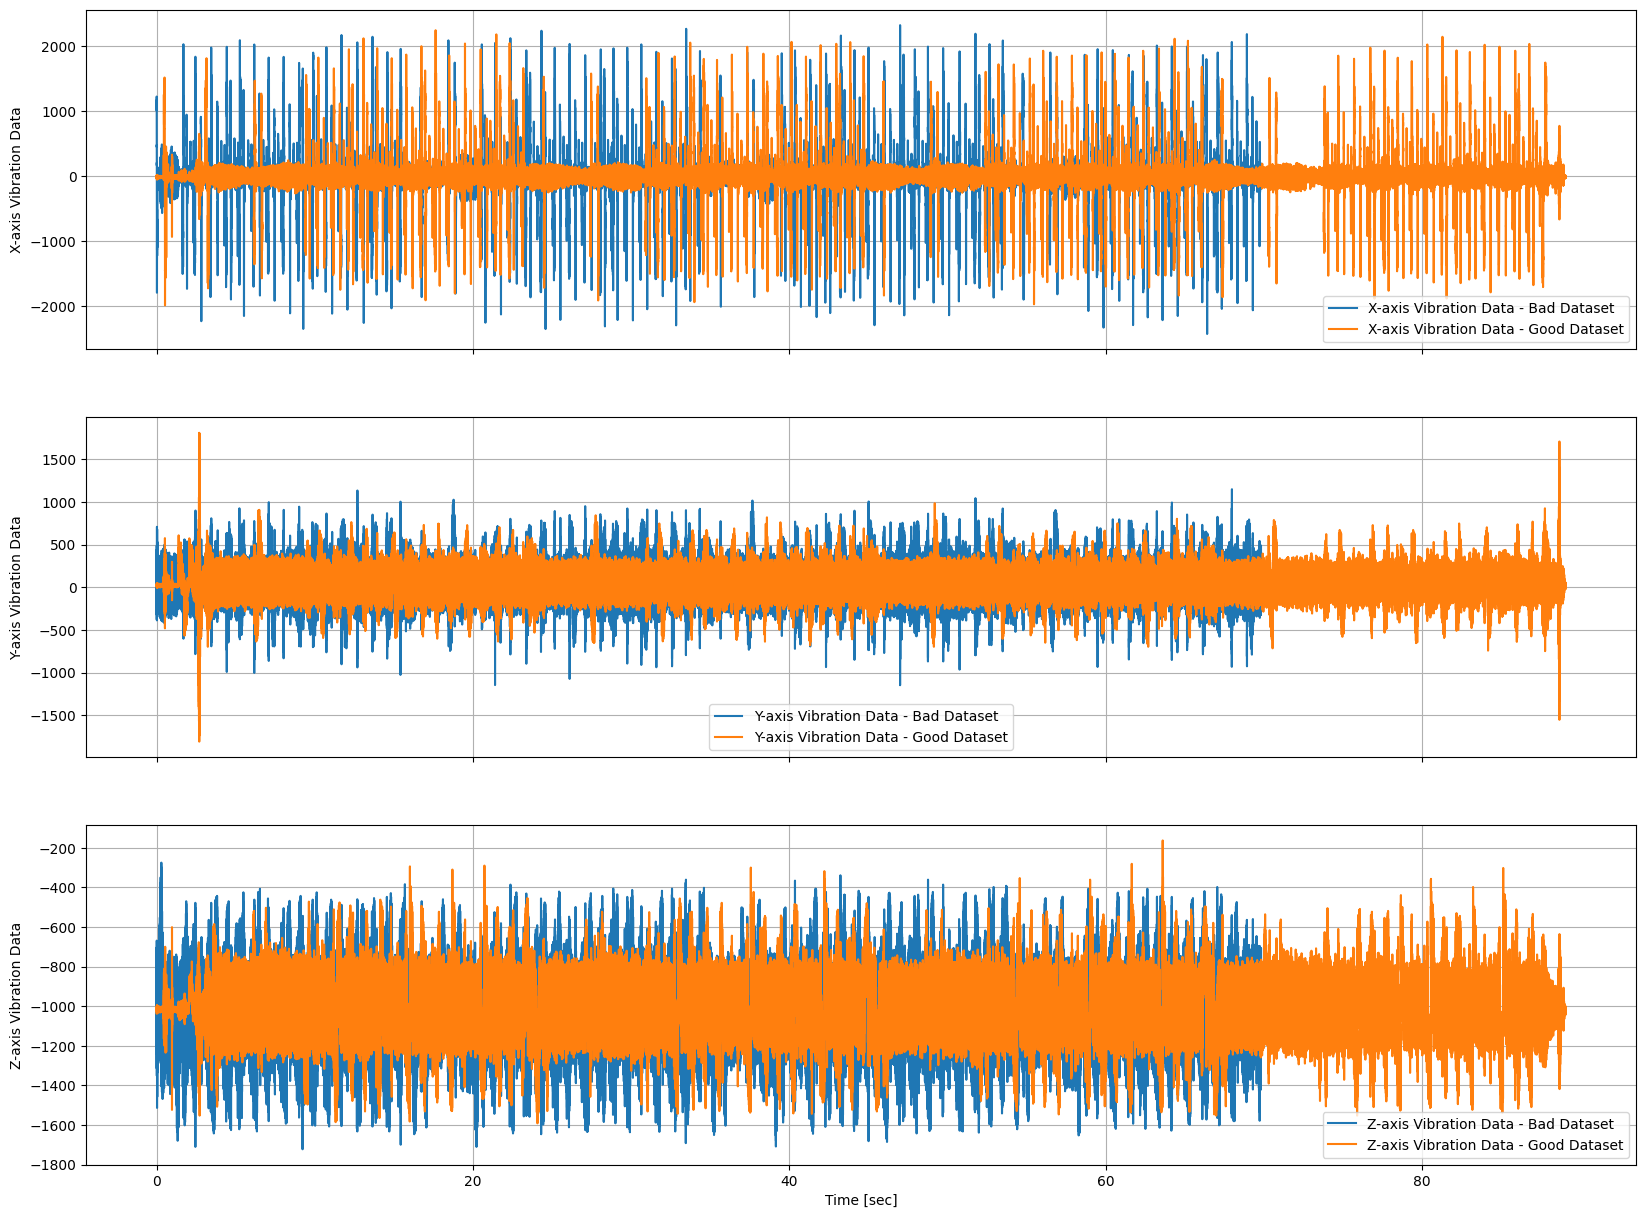

In [20]:
# Example usage:
files=['./data/M01/OP03/bad/M01_Aug_2019_OP03_000.h5', './data/M01/OP03/good/M01_Aug_2019_OP03_009.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)



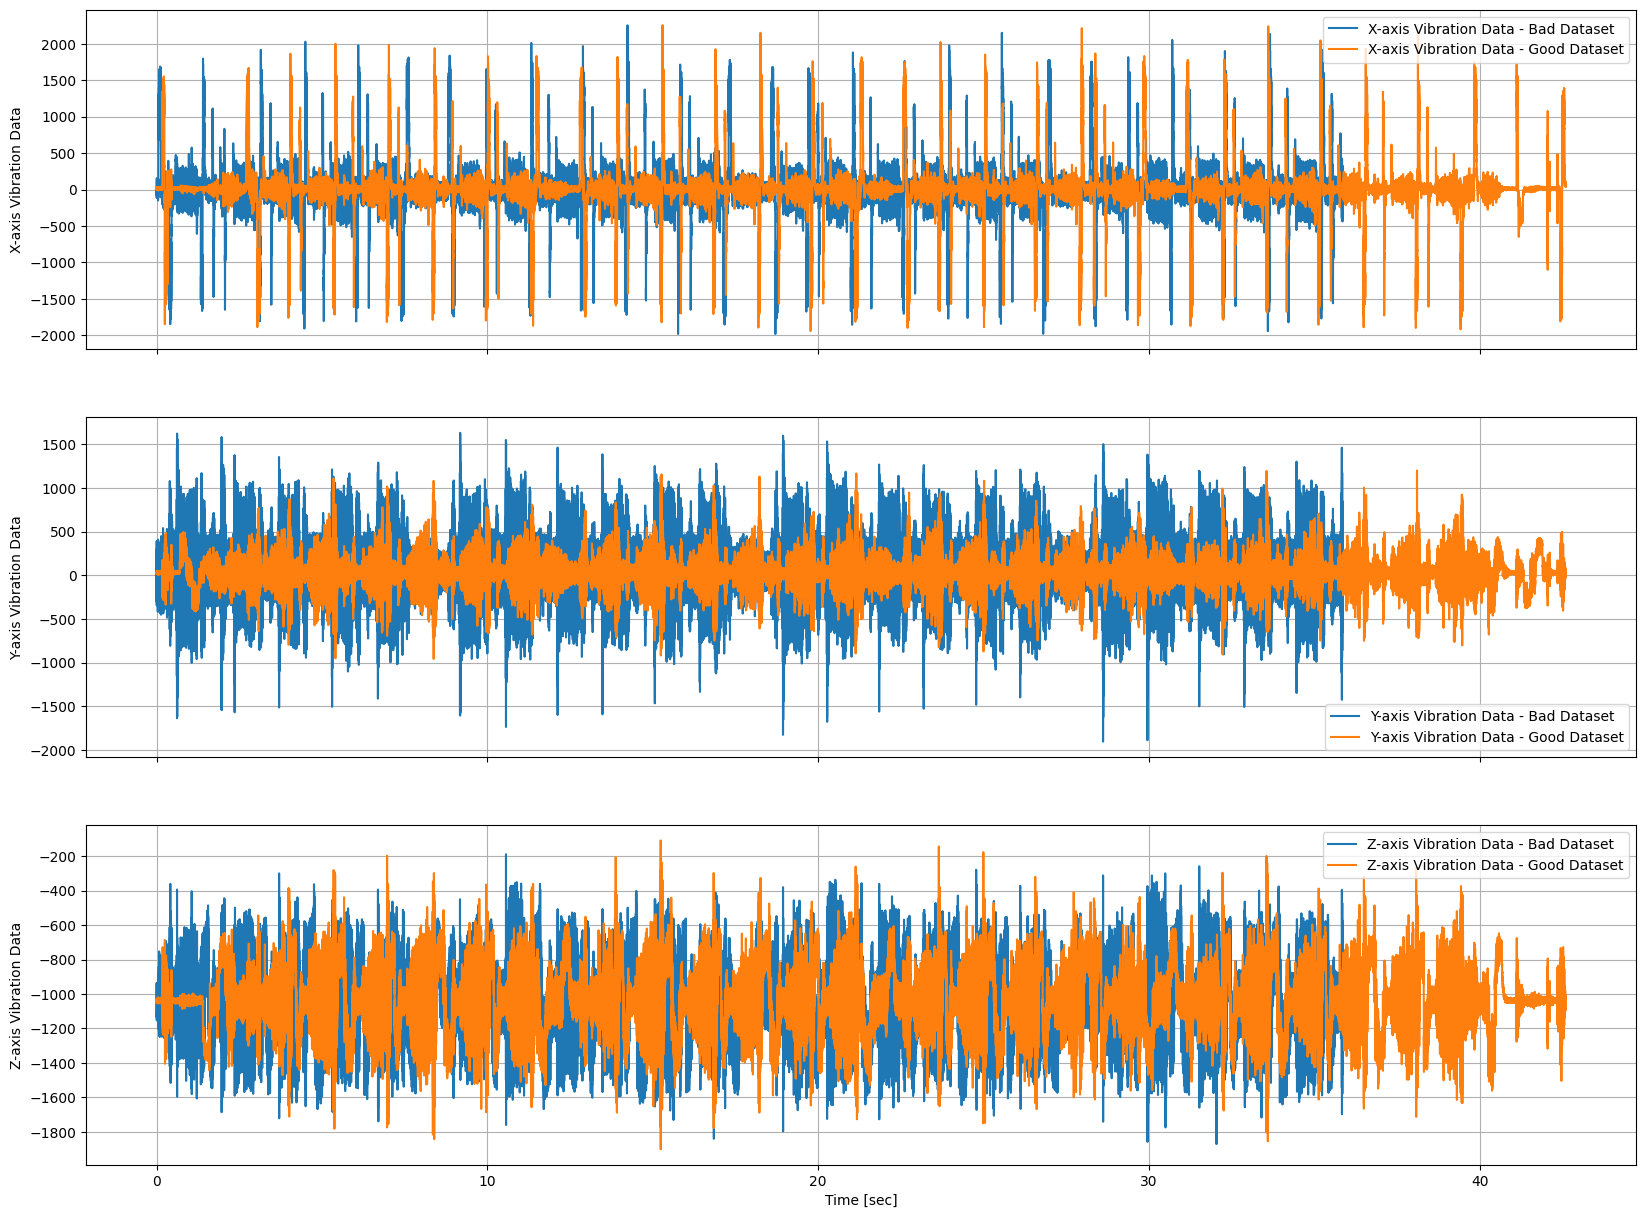

In [21]:
files=['./data/M01/OP02/bad/M01_Feb_2019_OP02_000.h5', './data/M01/OP02/good/M01_Feb_2019_OP02_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


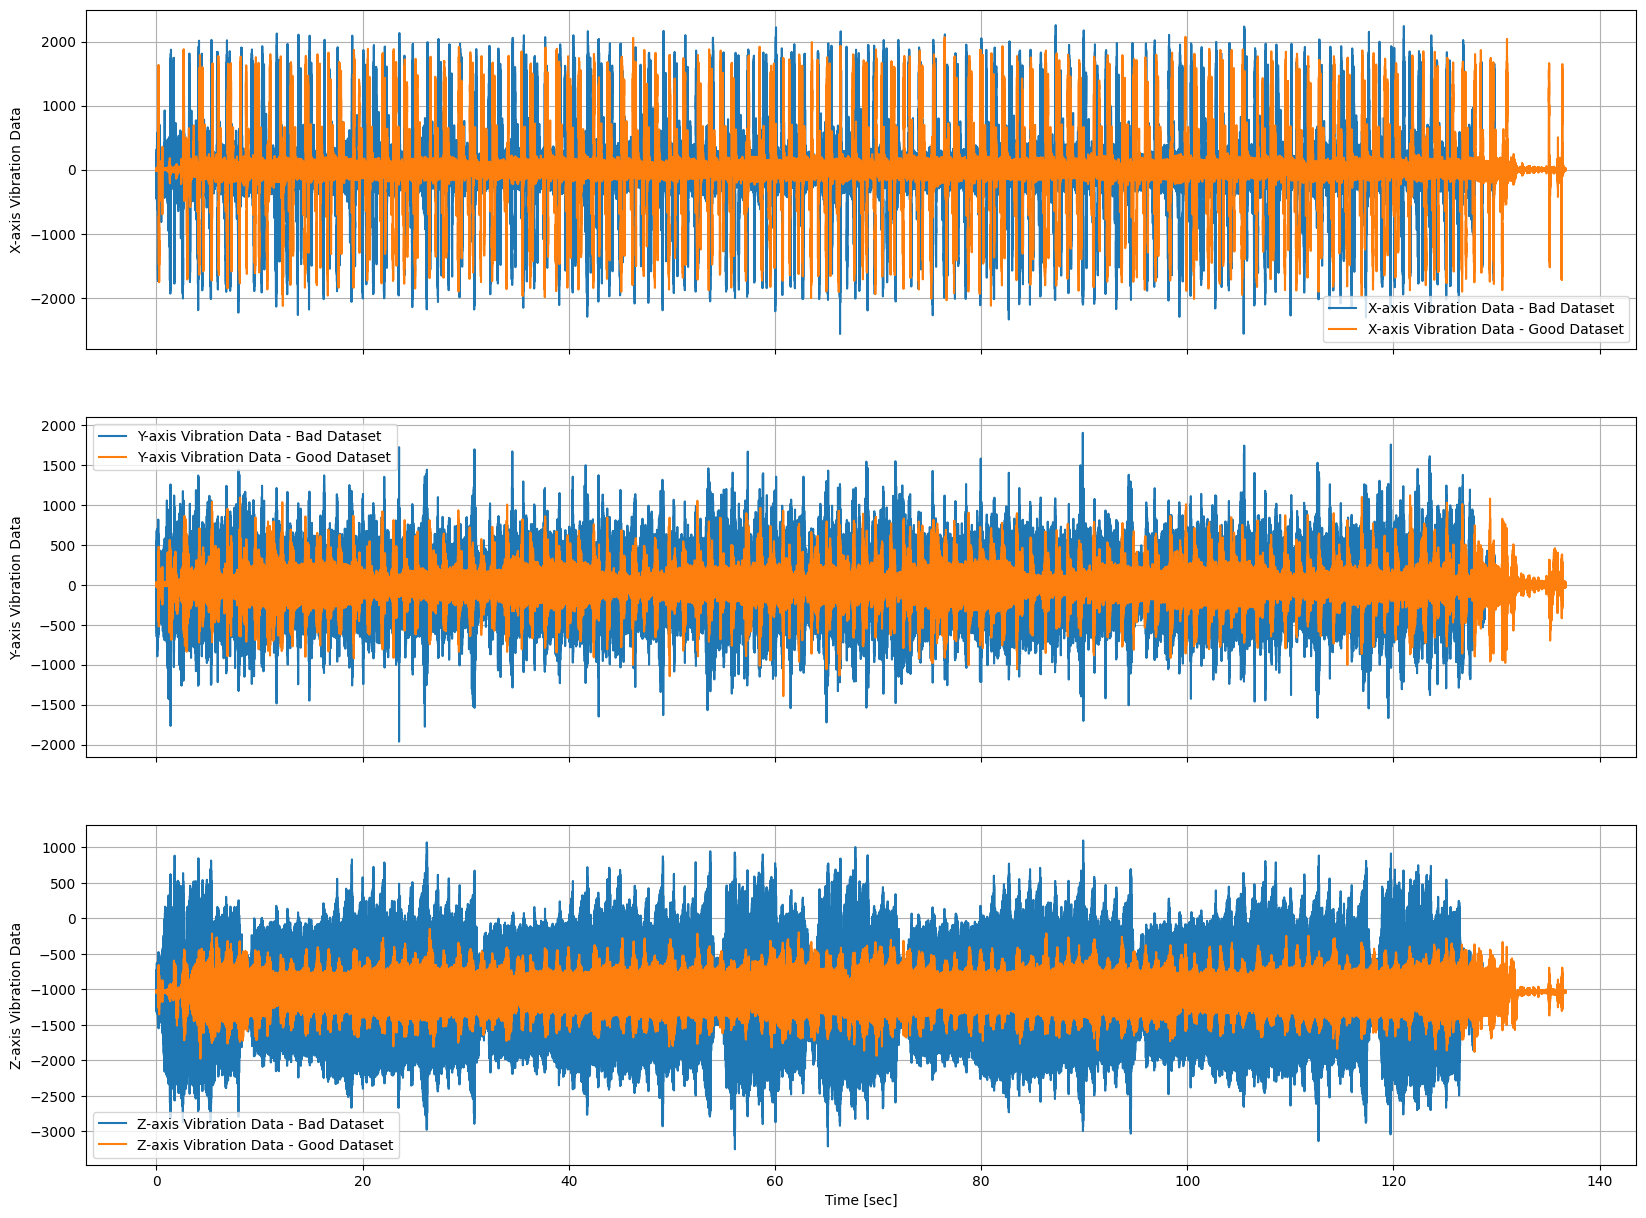

In [22]:
files=['./data/M02/OP00/bad/M02_Feb_2021_OP00_000.h5', './data/M02/OP00/good/M02_Feb_2021_OP00_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


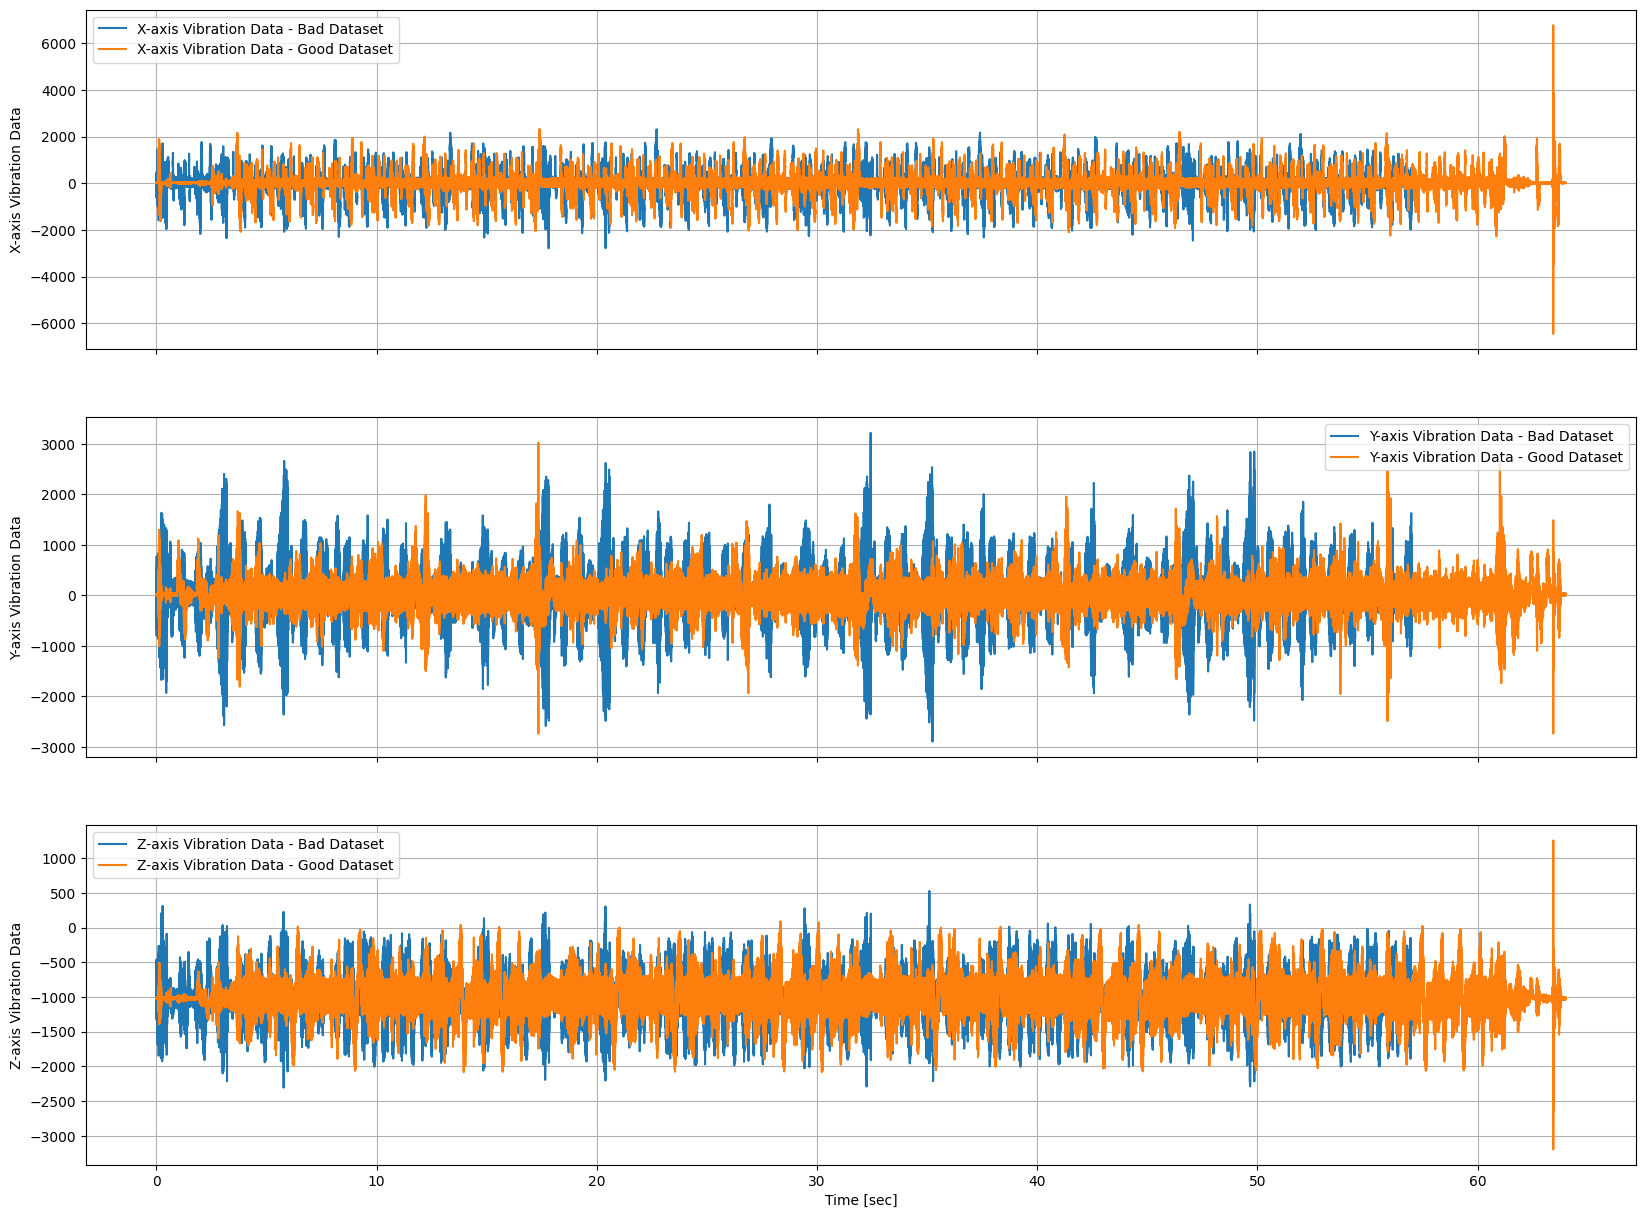

In [23]:
files=['./data/M03/OP04/bad/M03_Aug_2019_OP04_000.h5', './data/M03/OP04/good/M03_Aug_2019_OP04_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


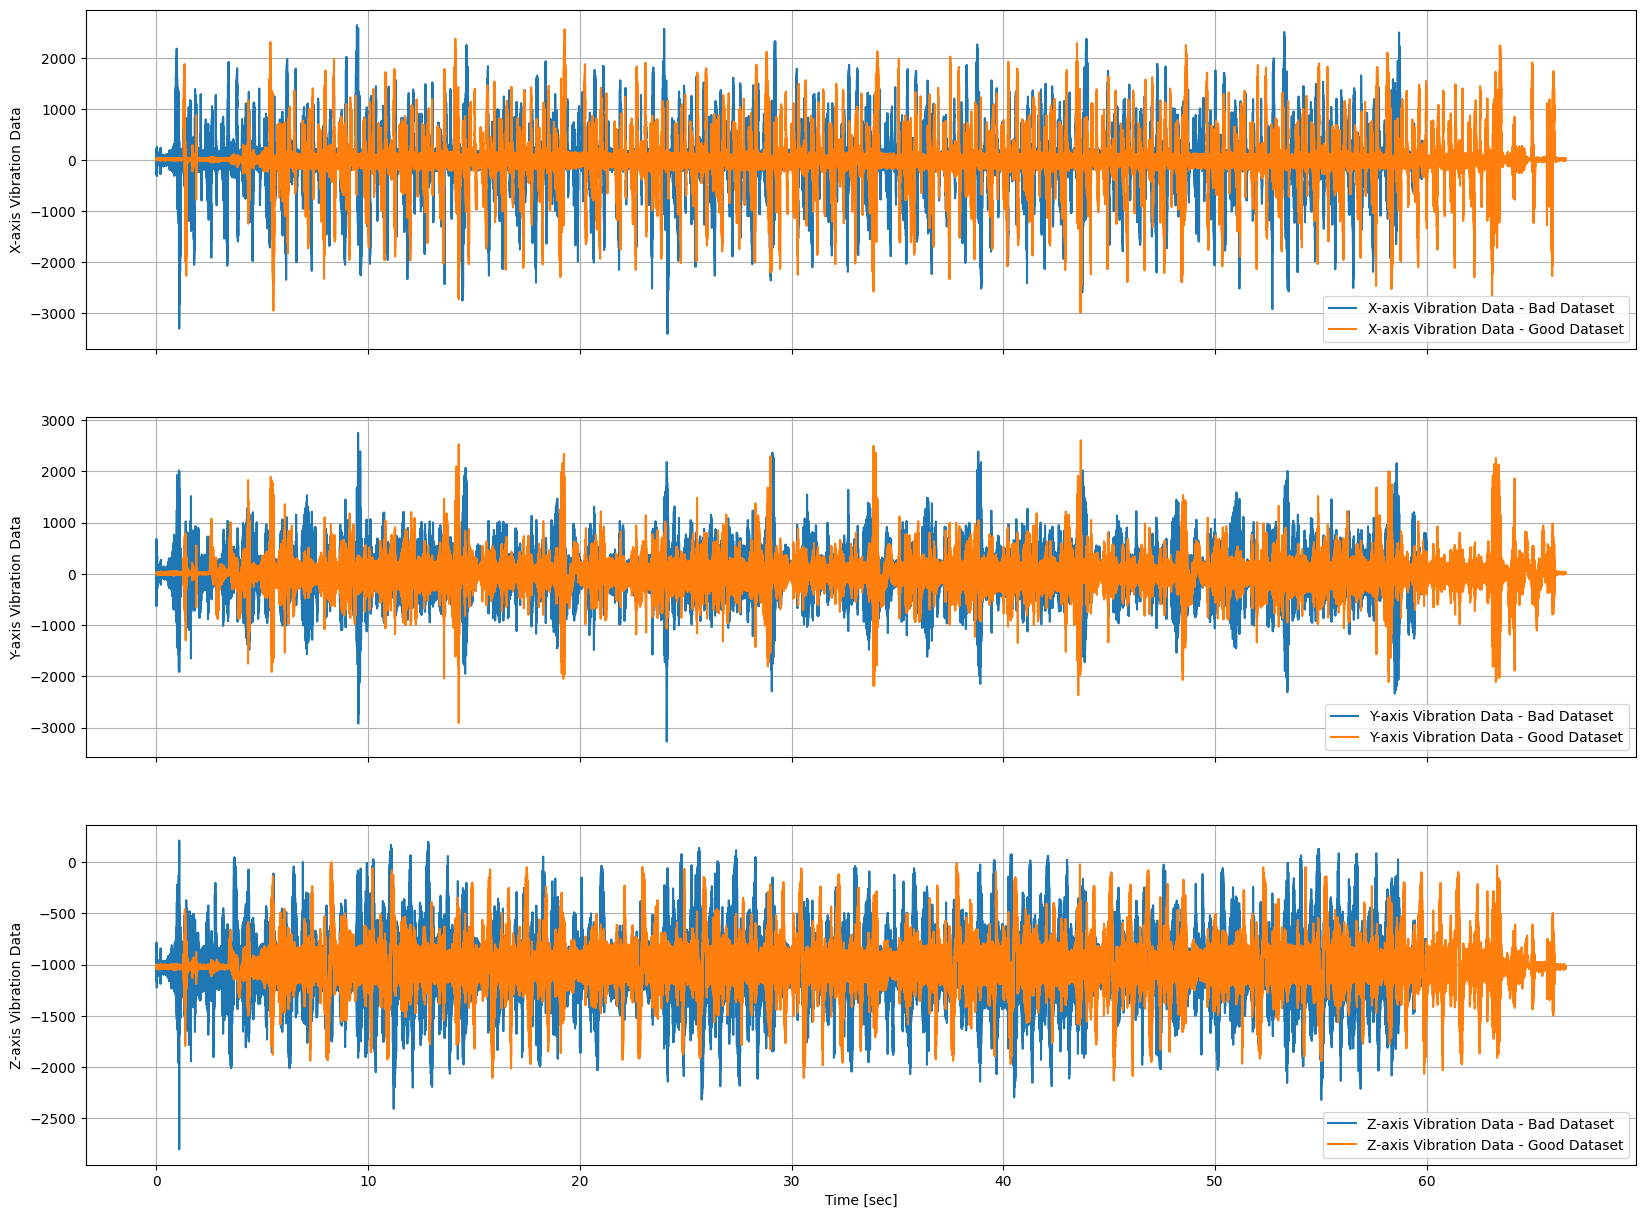

In [24]:
files=['./data/M03/OP04/bad/M03_Feb_2021_OP04_000.h5', './data/M03/OP04/good/M03_Feb_2021_OP04_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


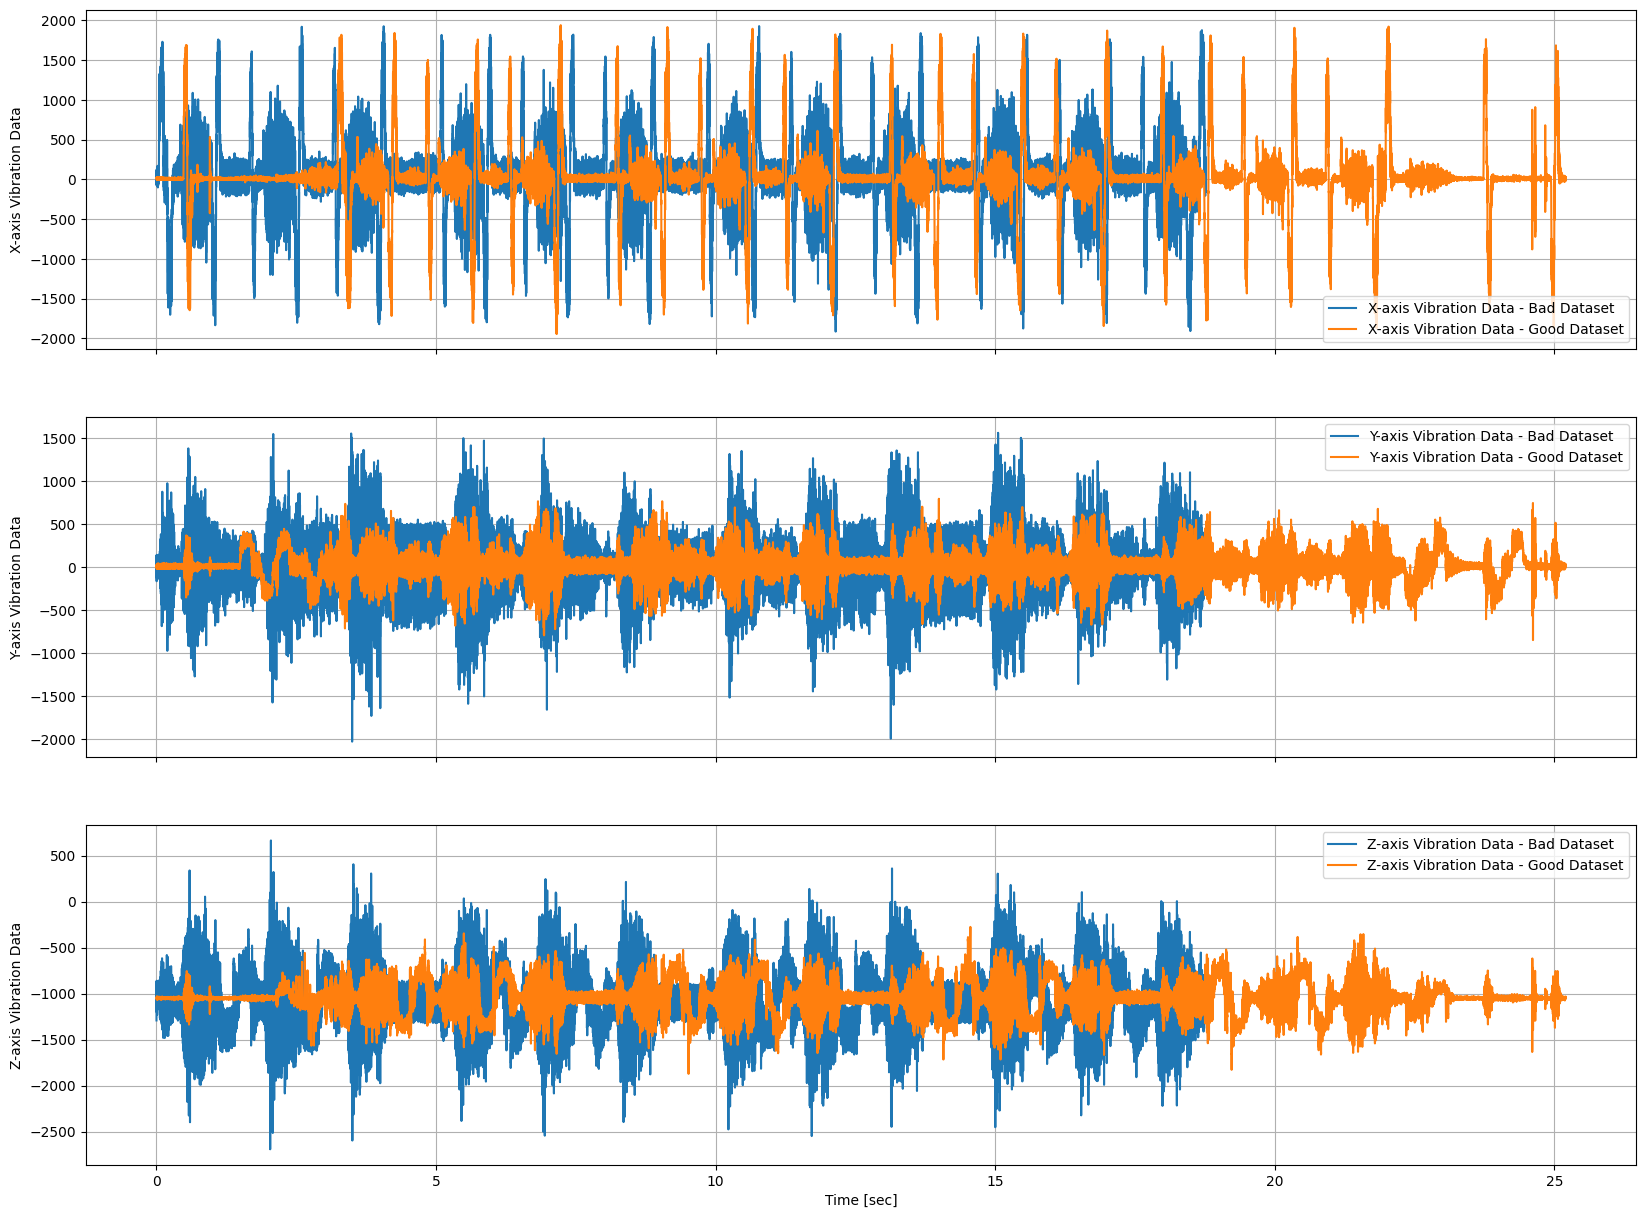

In [25]:
files=['./data/M02/OP07/bad/M02_Feb_2019_OP07_000.h5', './data/M02/OP07/good/M02_Feb_2019_OP07_000.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)


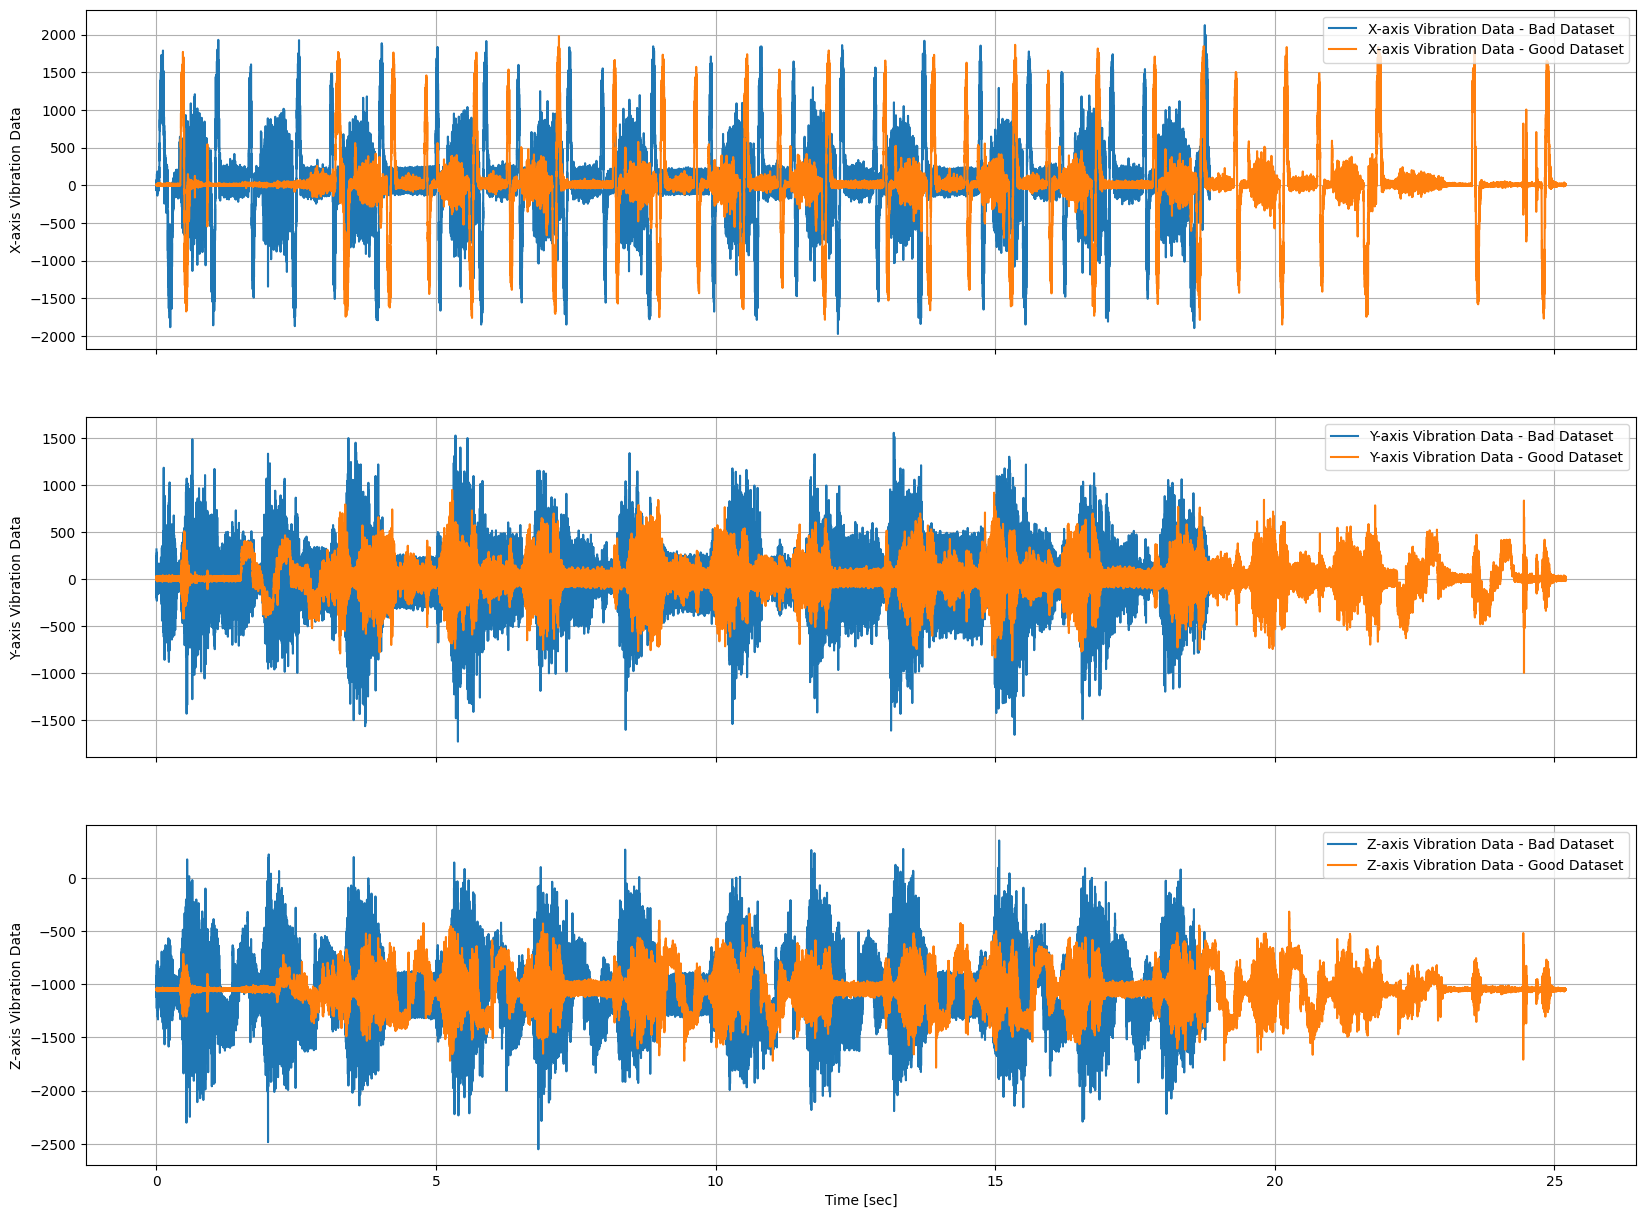

In [26]:
files=['./data/M02/OP07/bad/M02_Feb_2019_OP07_001.h5', './data/M02/OP07/good/M02_Feb_2019_OP07_001.h5']
dataset_labels = ["Bad Dataset", "Good Dataset"]  # Add labels for your datasets

data = datafile_read(files, dataset_labels)

In [28]:
def compute_fft(signal, sampling_rate=2000):
    """Calculates the FFT of a signal.

    Args:
        signal: The time-domain signal (a NumPy array).
        sampling_rate: The sampling rate of the signal in Hz.

    Returns:
        (frequencies, fft_values): A tuple containing:
            * frequencies: An array of frequencies corresponding to the FFT bins.
            * fft_values: An array of complex FFT values.
    """

    signal_length = len(signal)
    fft_values = np.fft.fft(signal)  # Calculate the FFT
    frequencies = np.fft.fftfreq(signal_length, d=1/sampling_rate)  # Frequencies

    # Keep only positive frequencies for real-world signals
    positive_indices = frequencies >= 0
    frequencies = frequencies[positive_indices]
    fft_values = fft_values[positive_indices]

    return frequencies, fft_values


/home/asadi/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/asadi/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


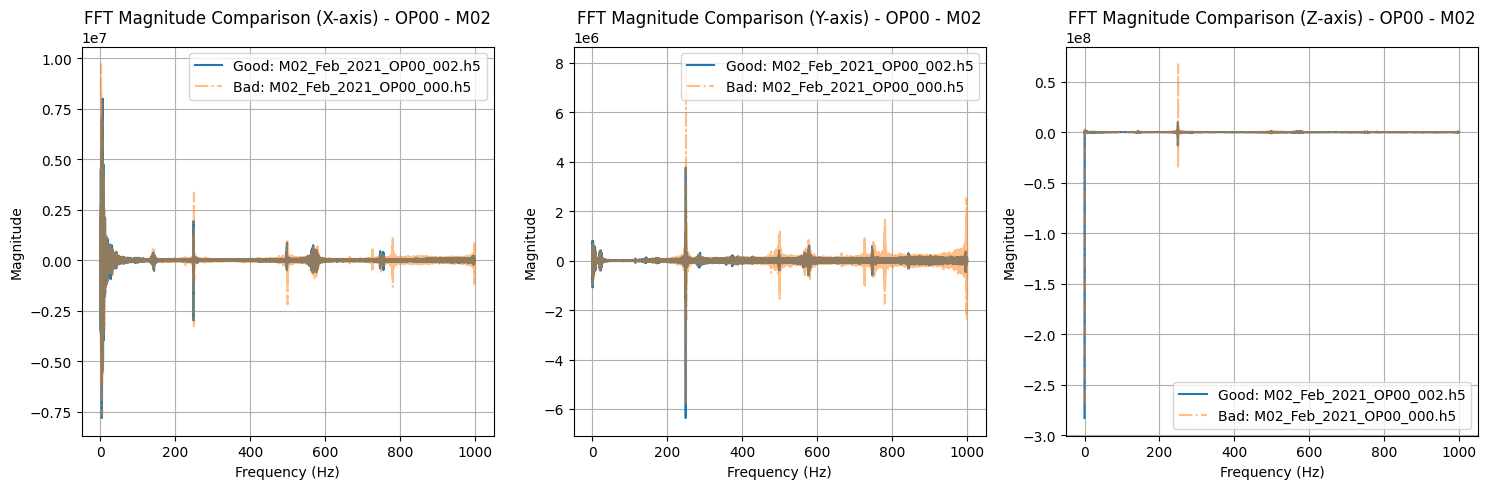

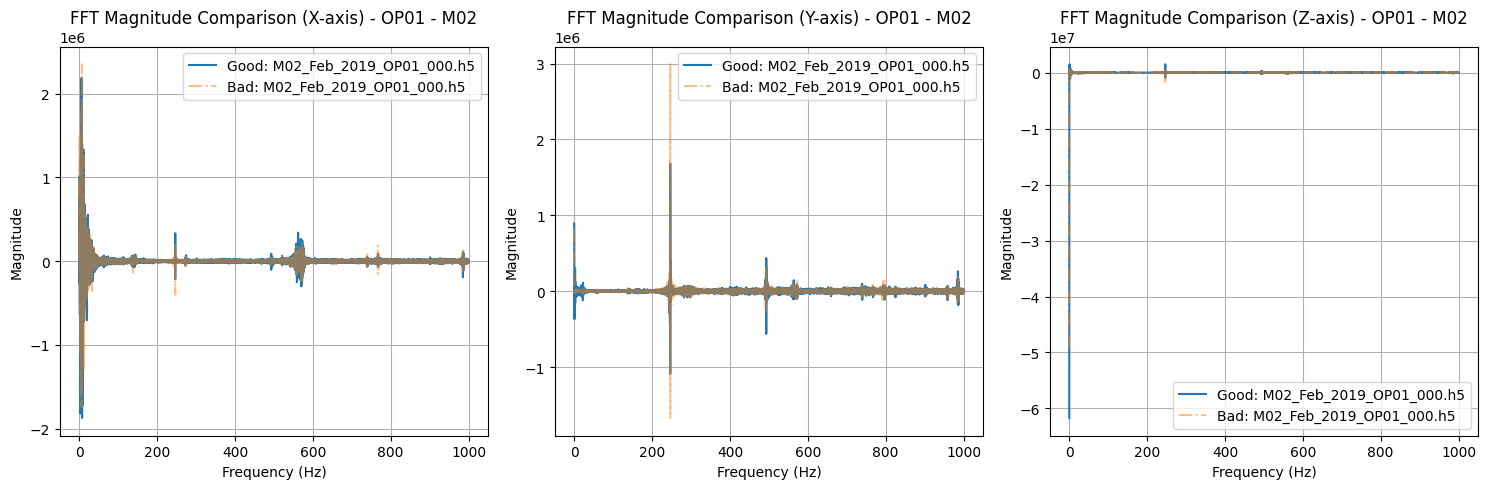

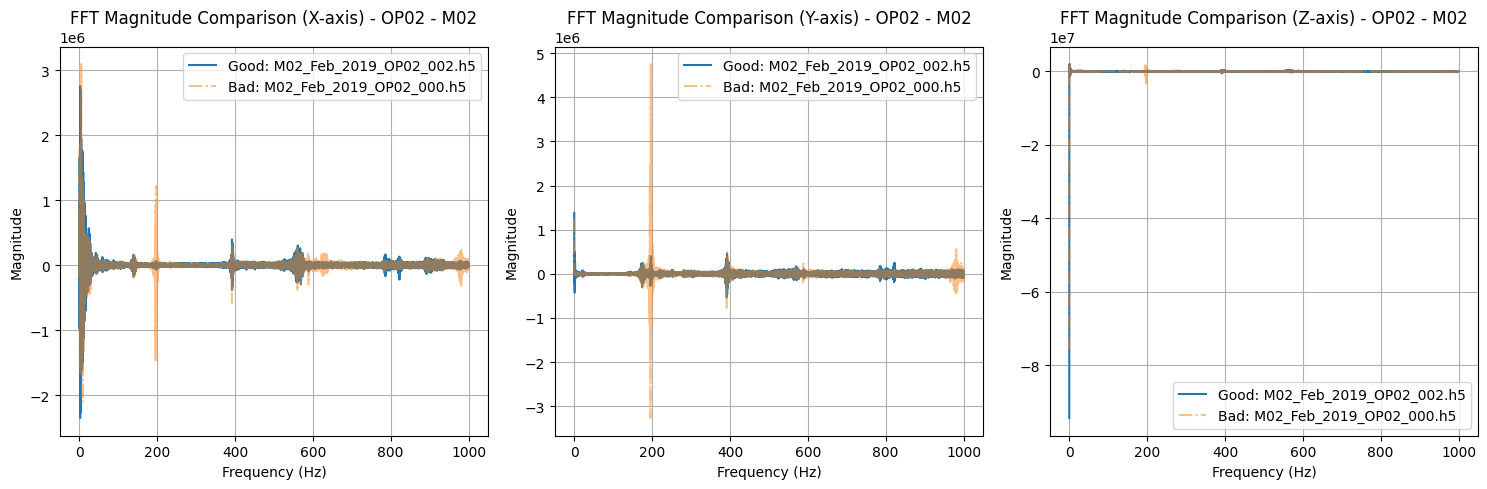

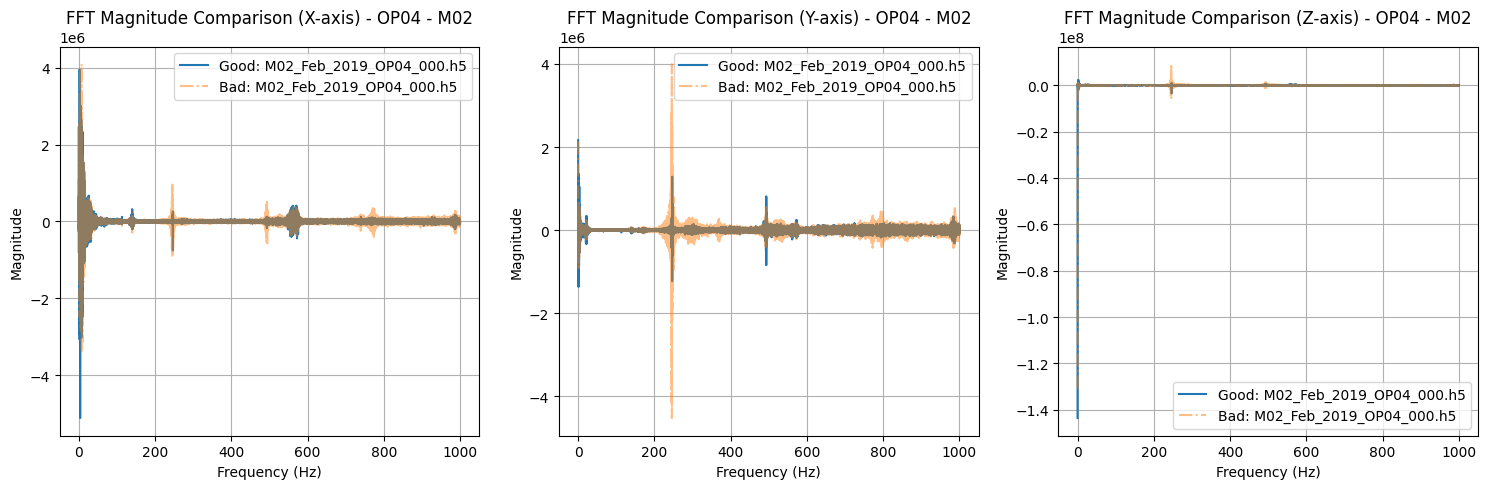

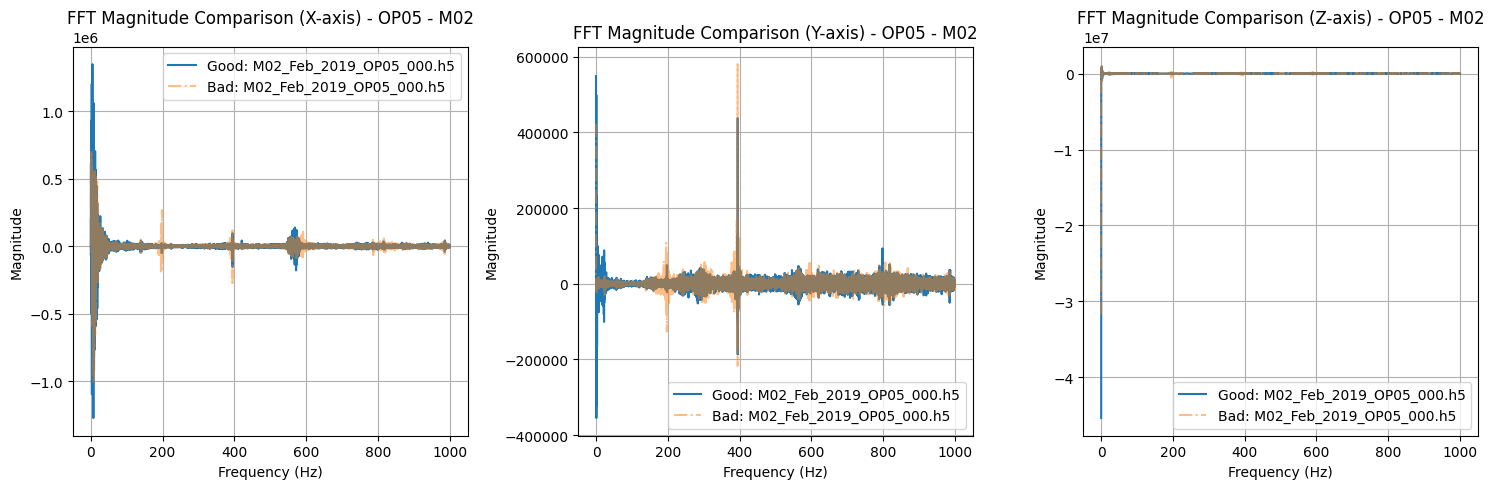

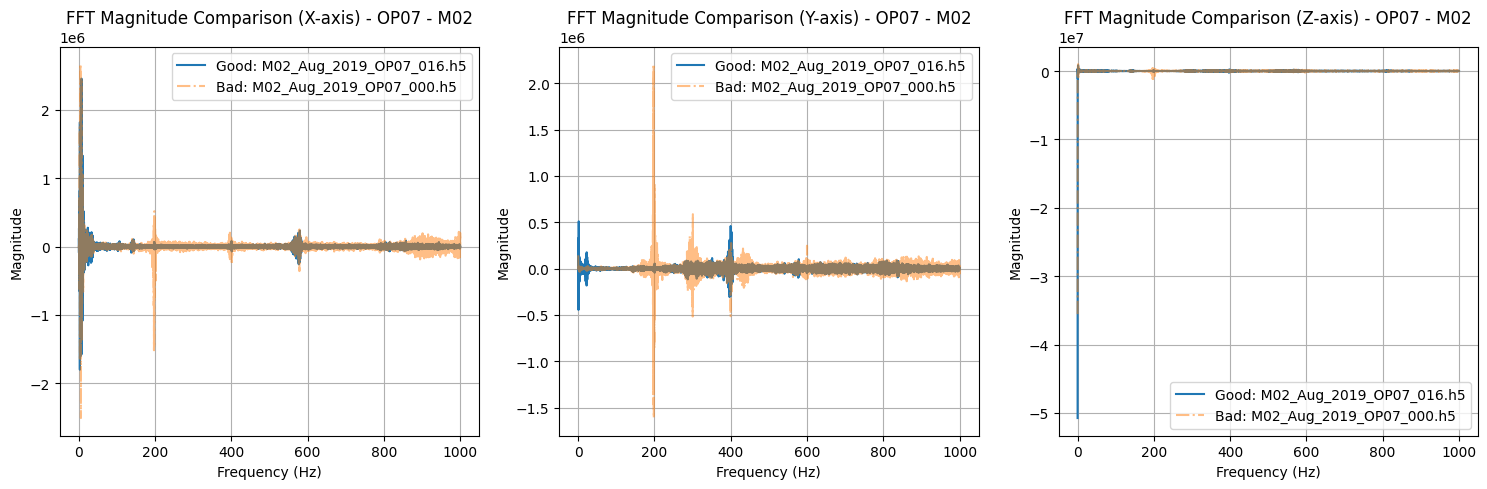

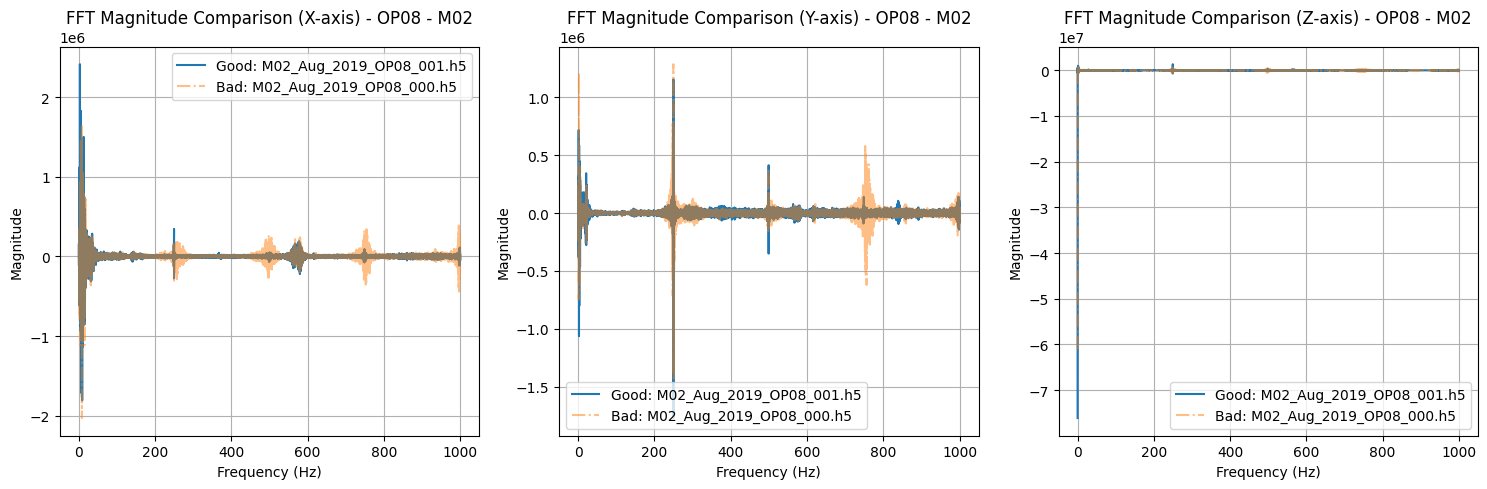

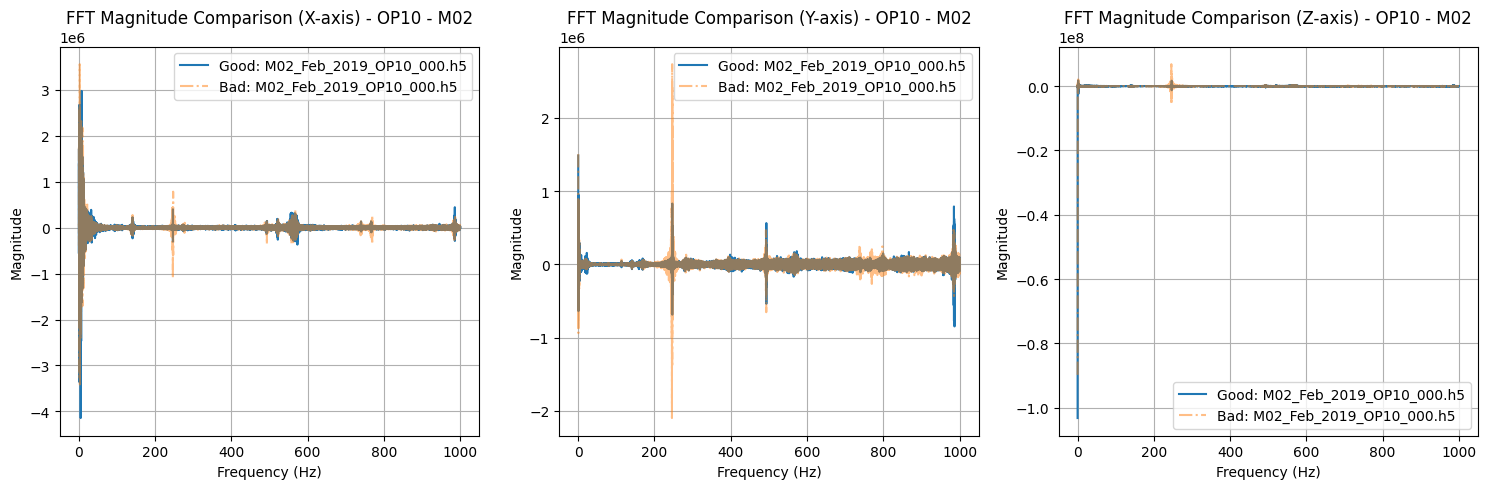

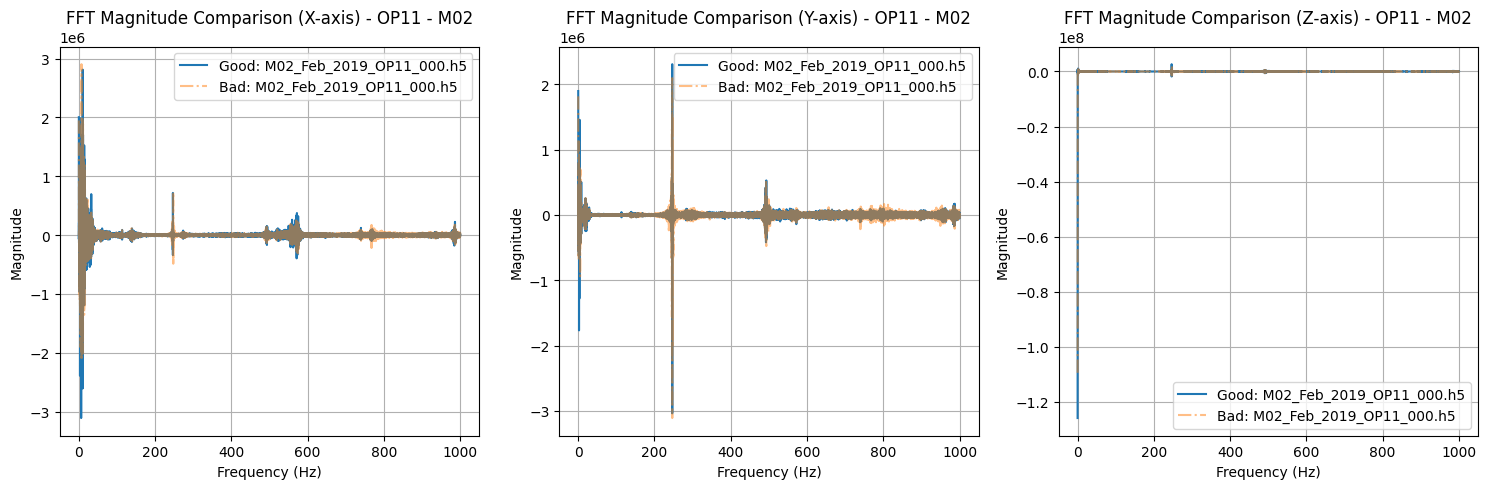

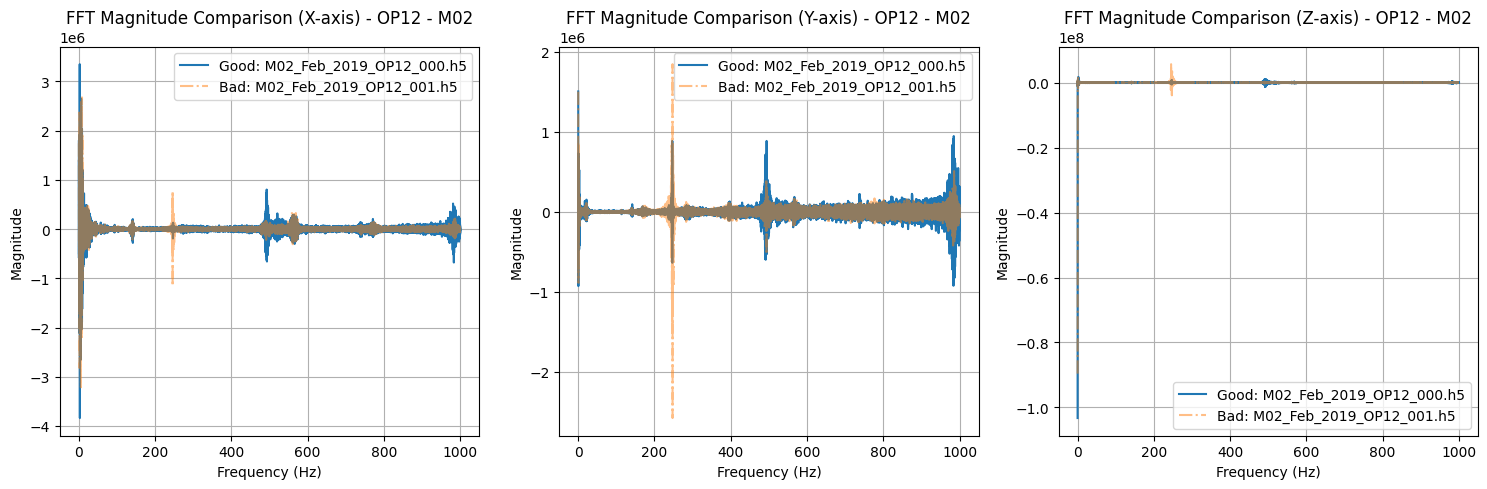

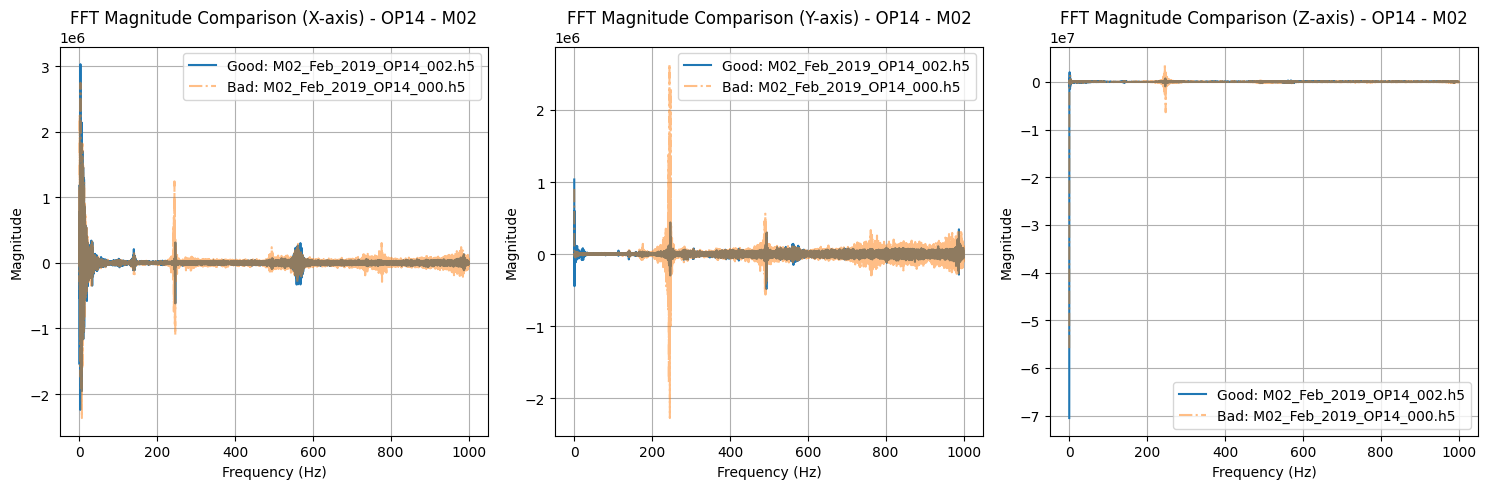

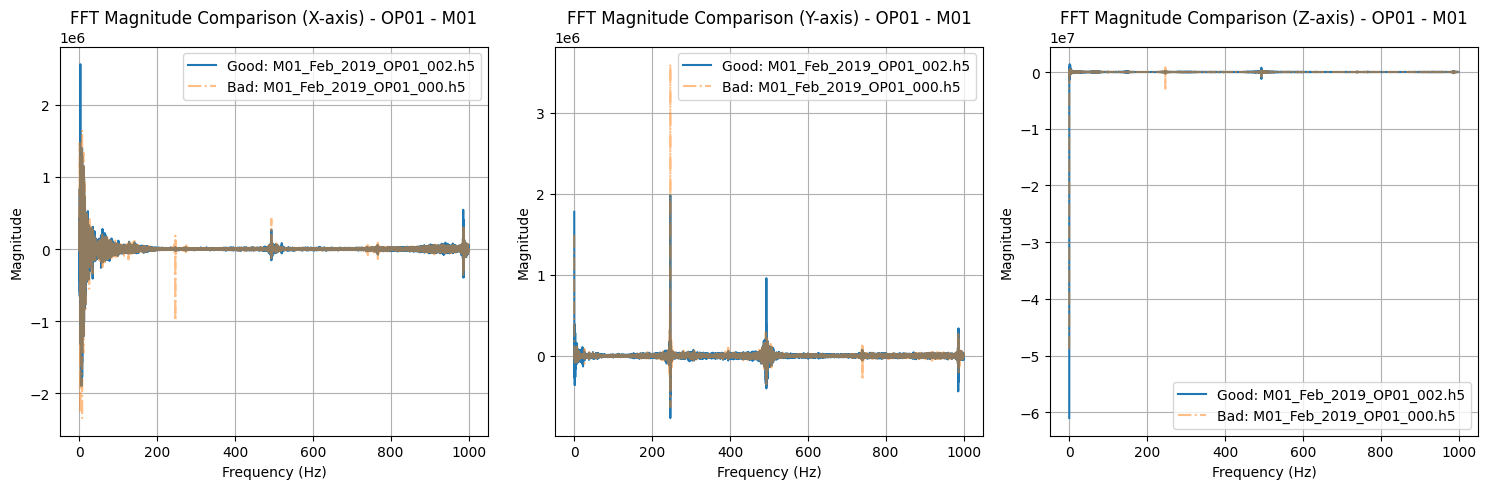

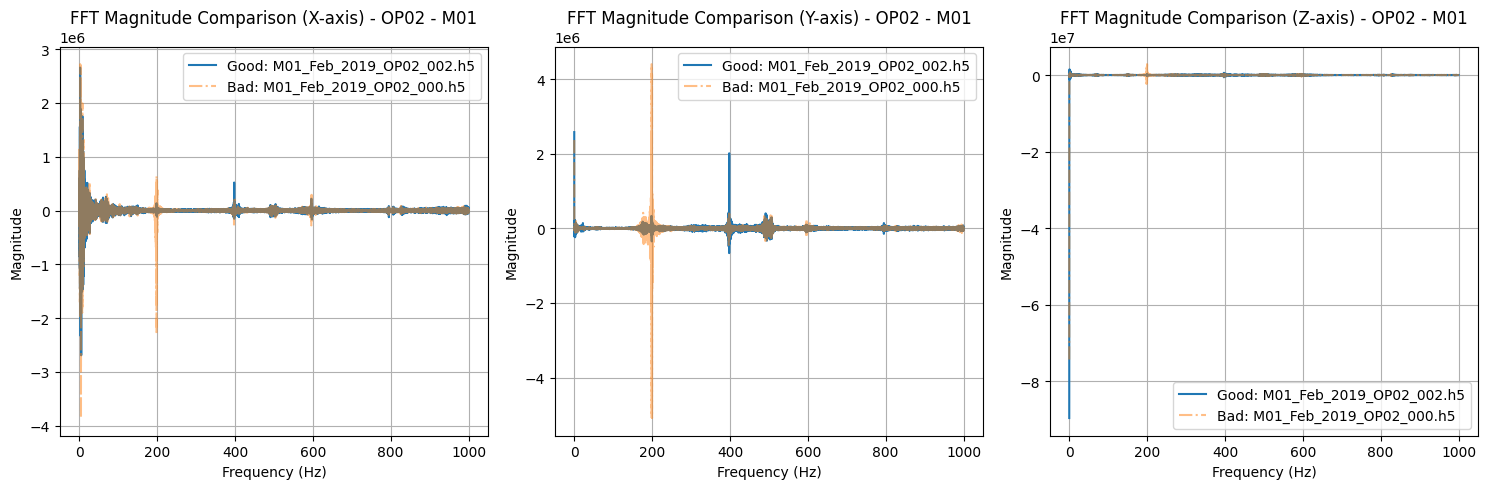

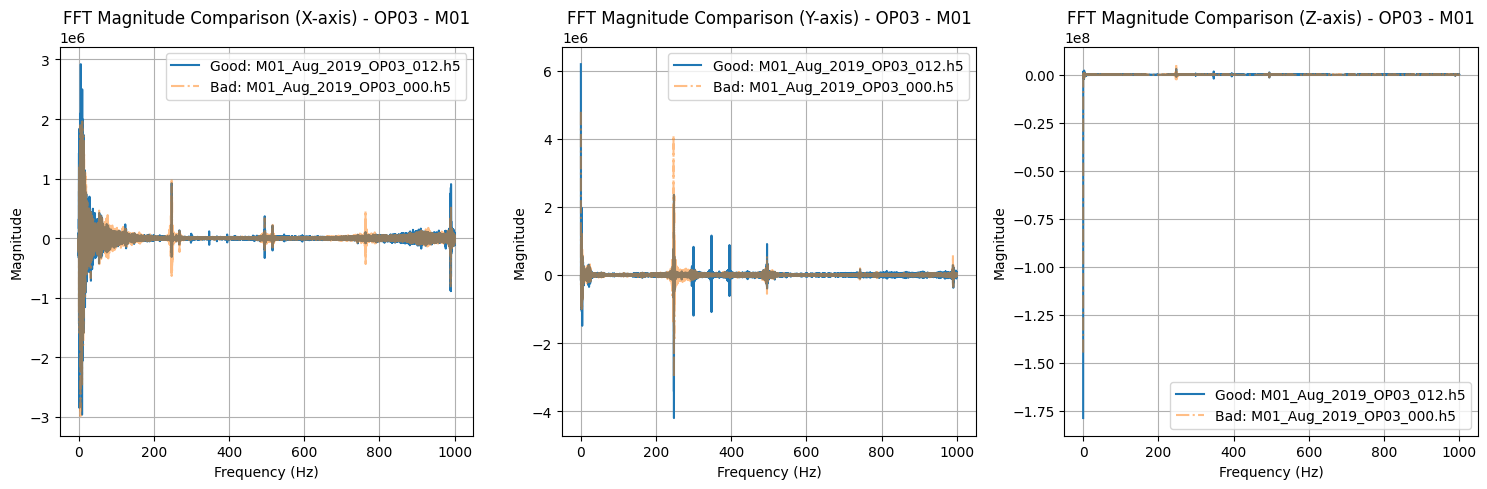

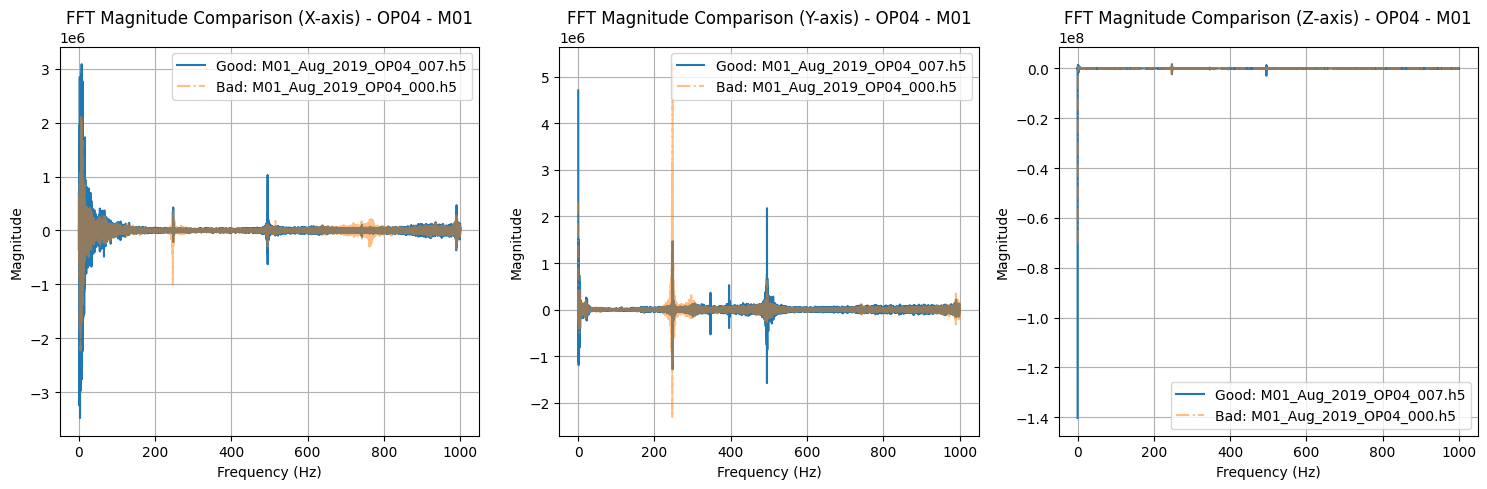

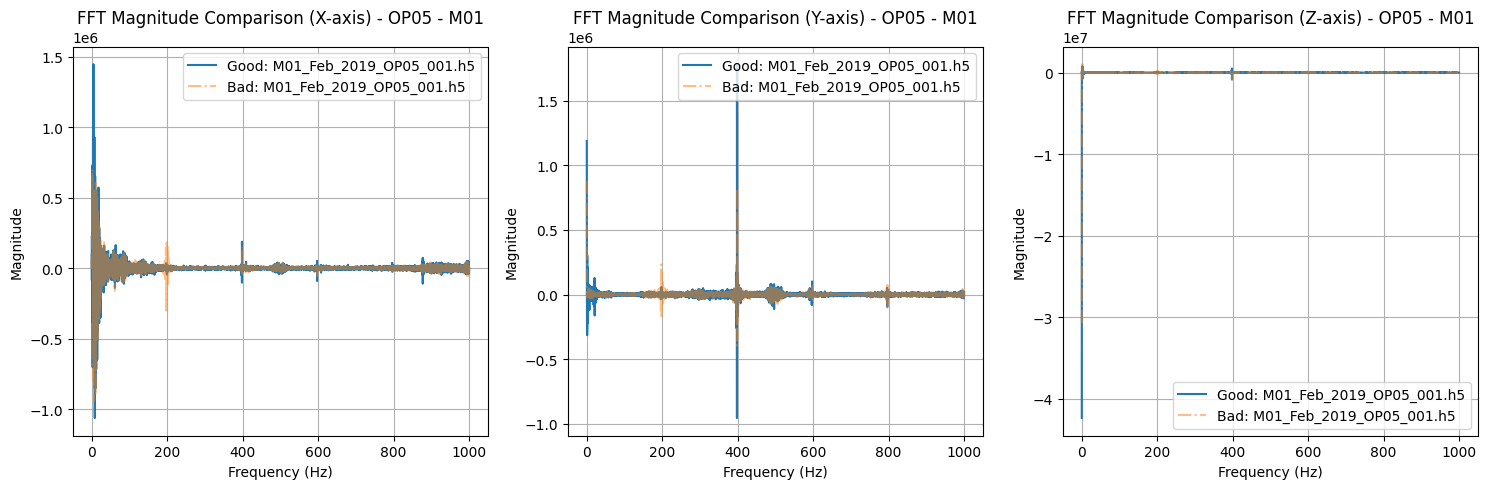

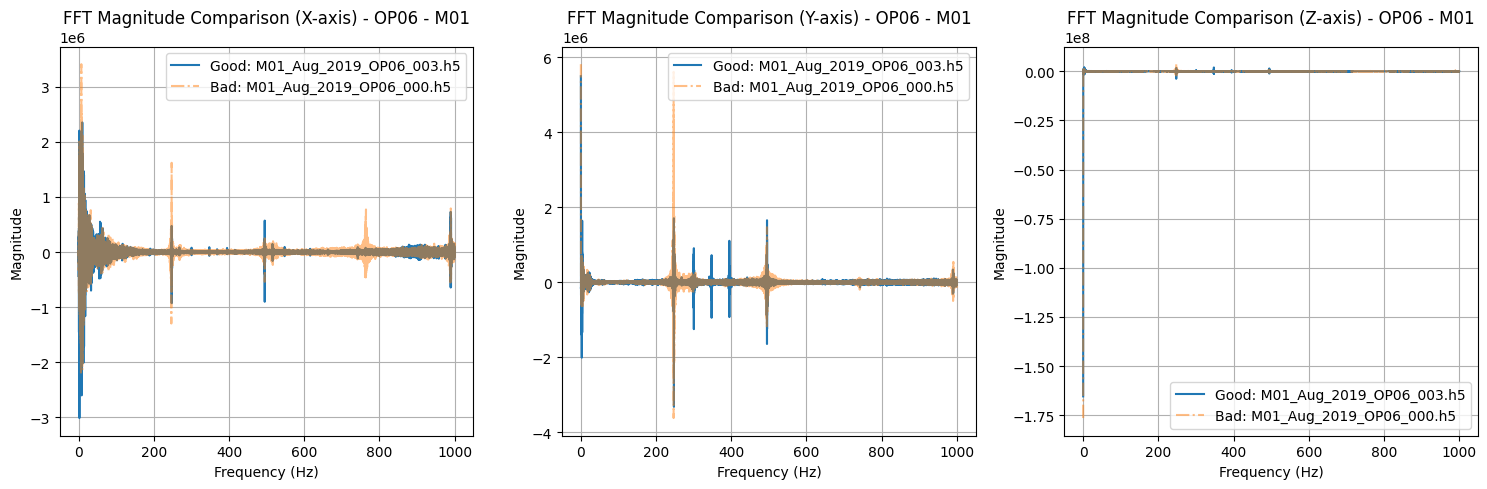

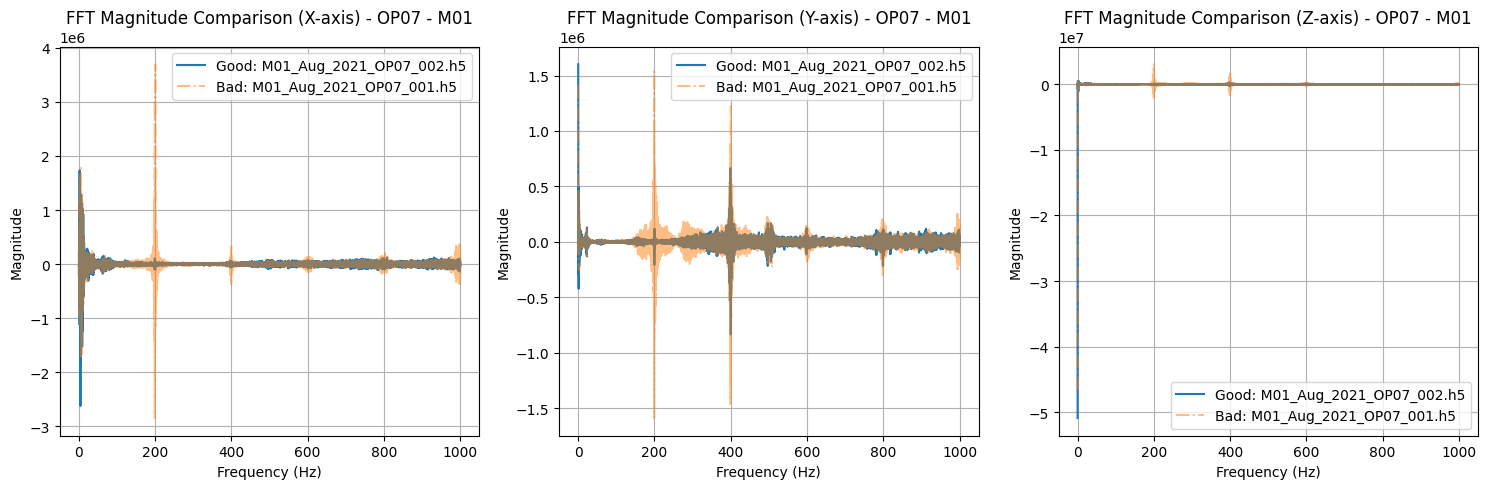

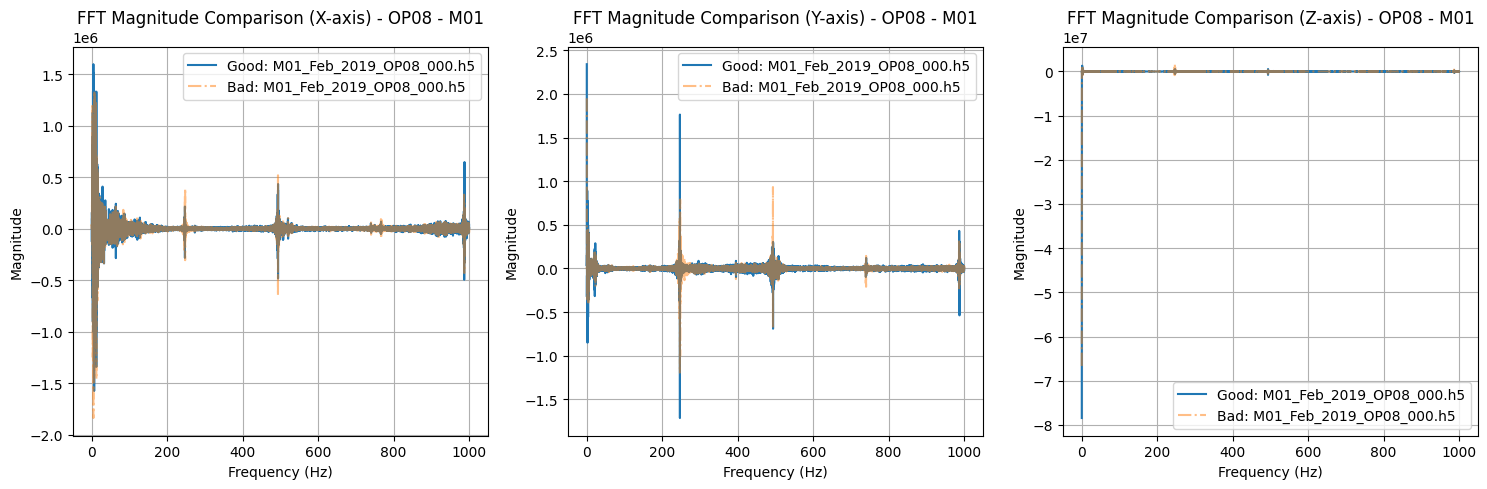

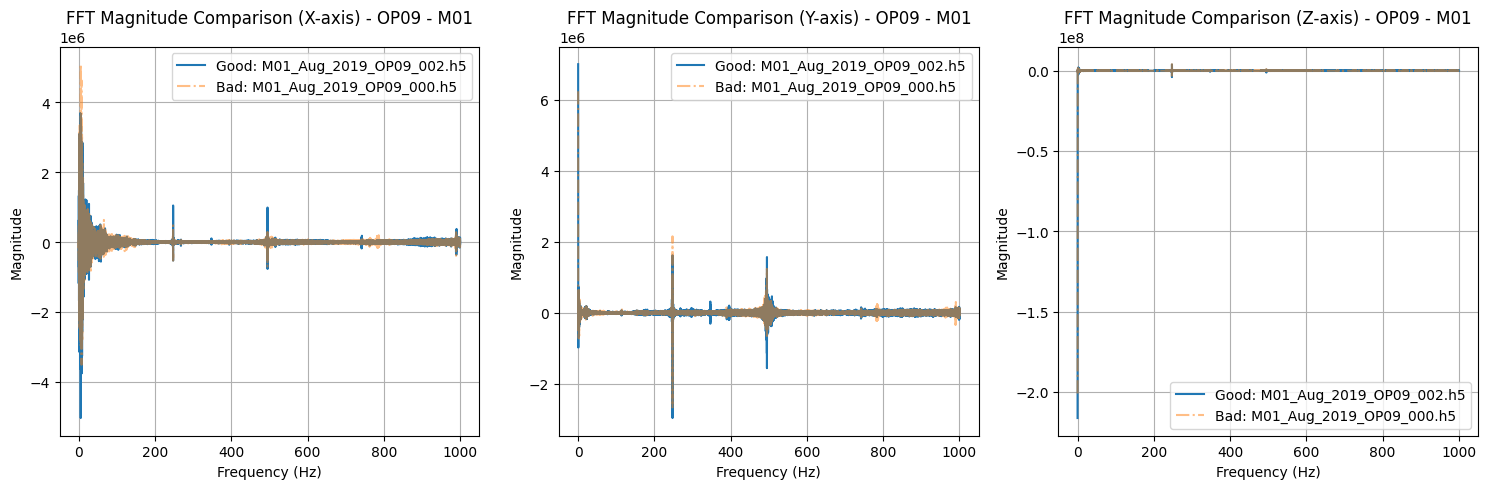

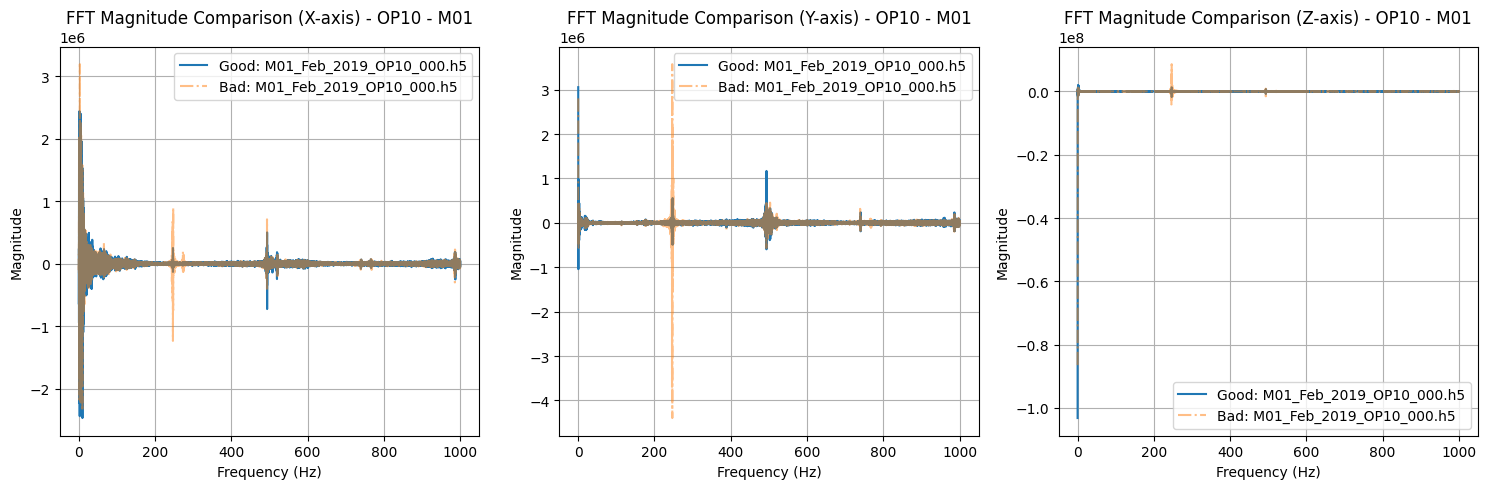

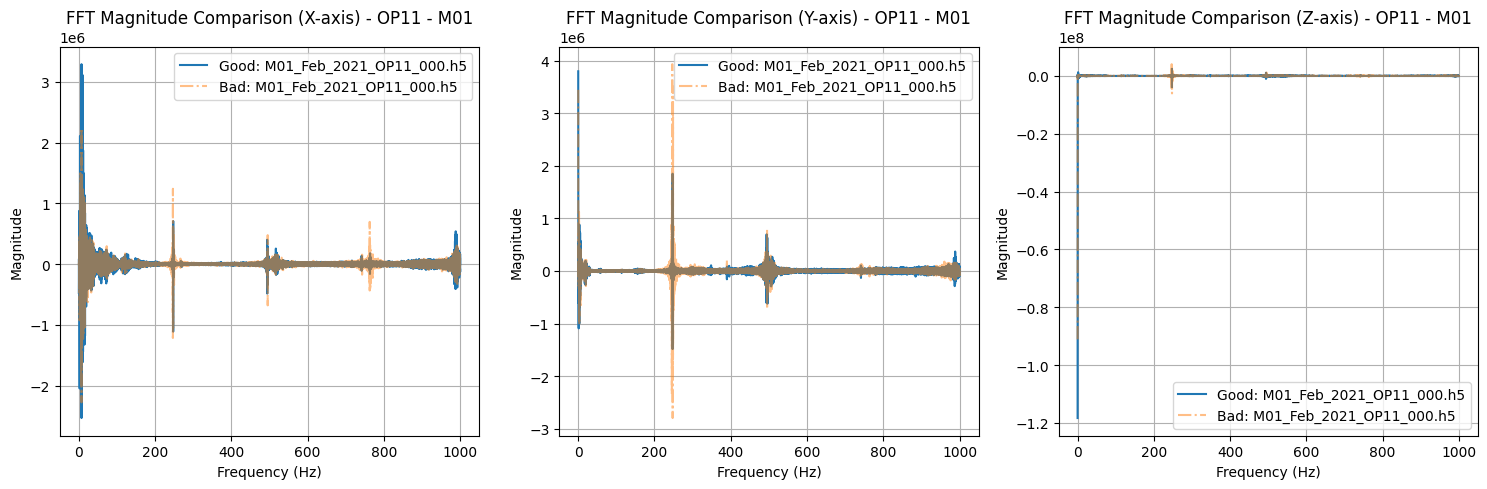

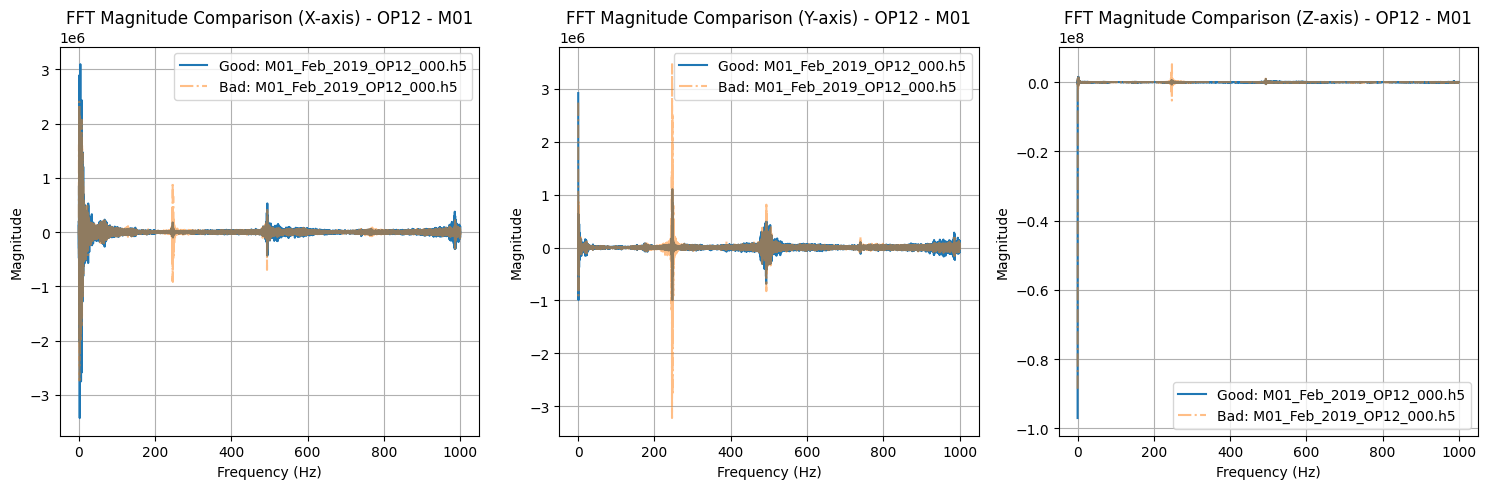

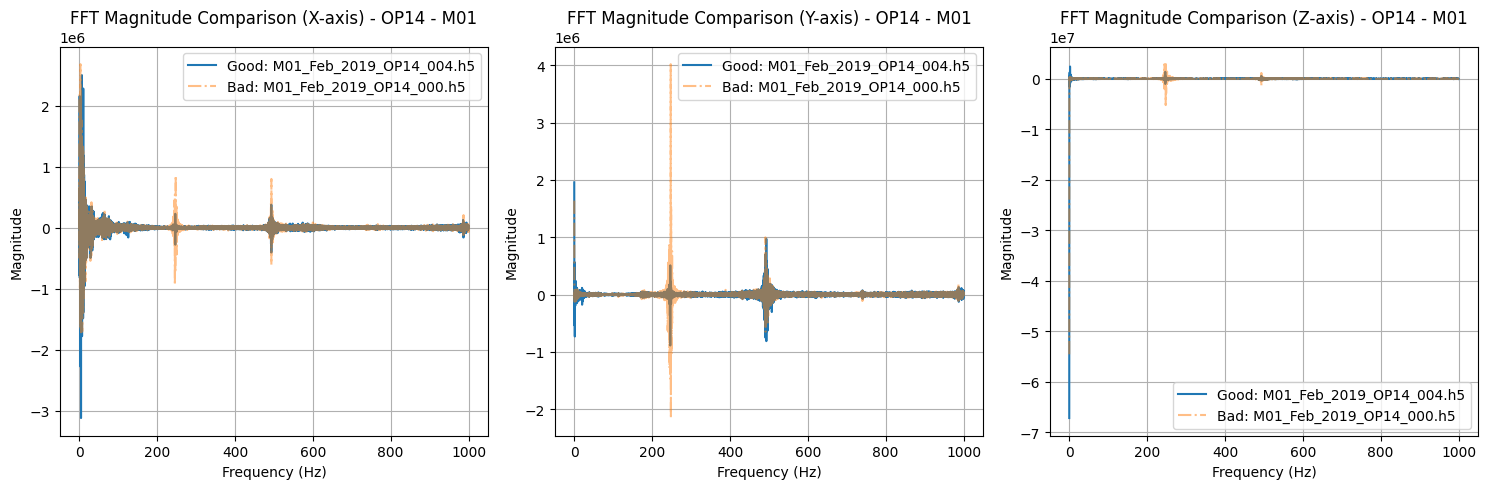

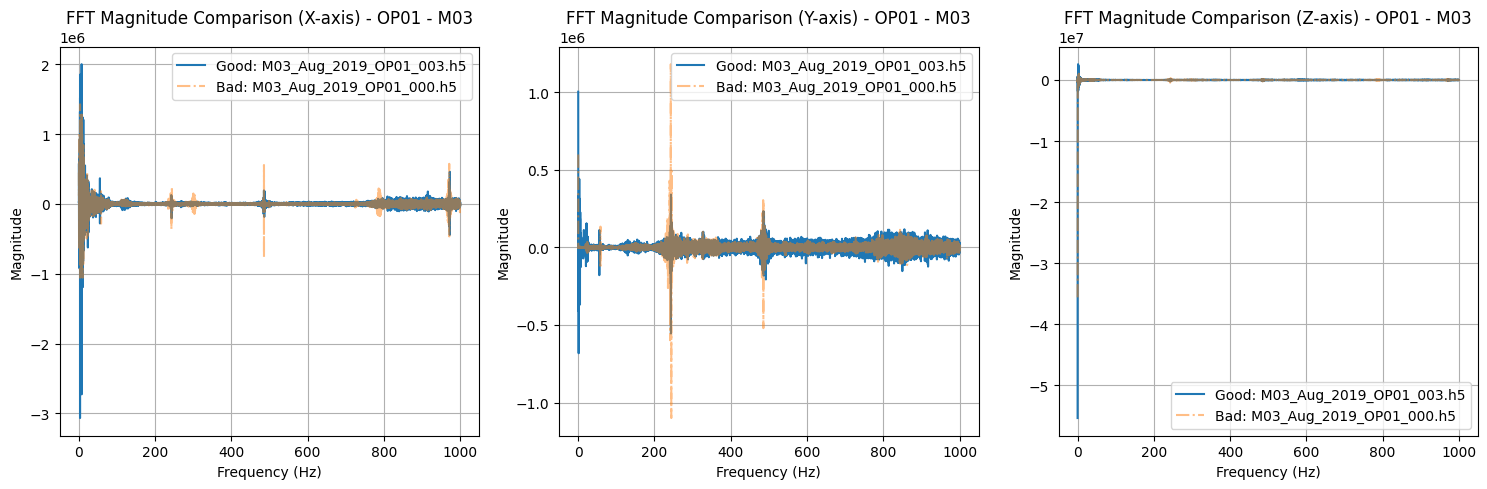

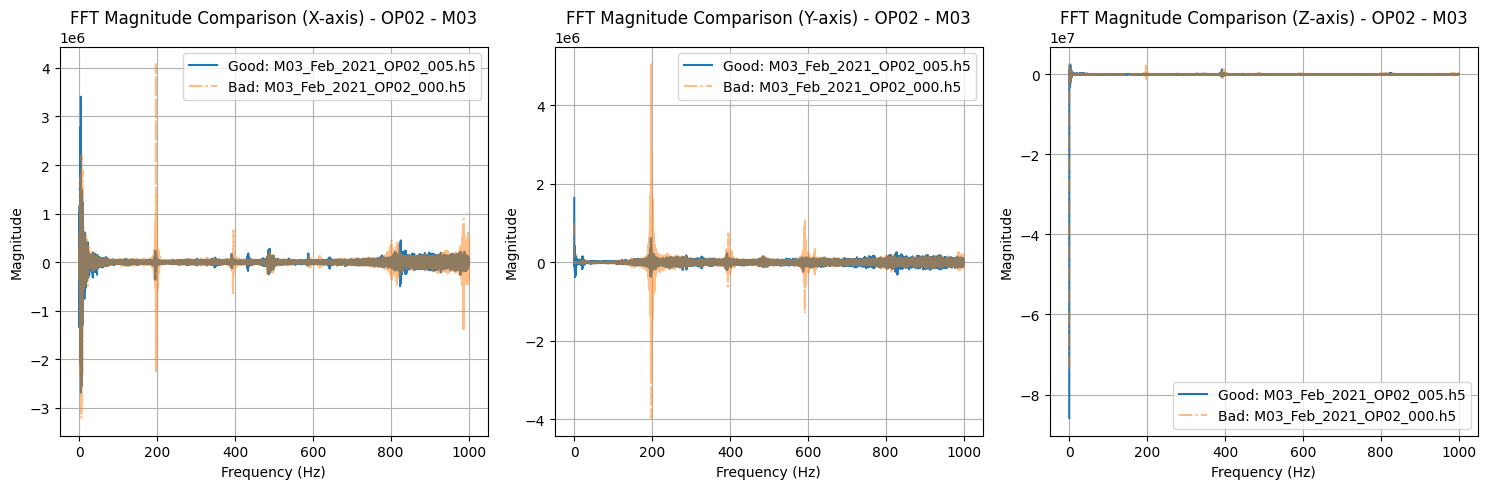

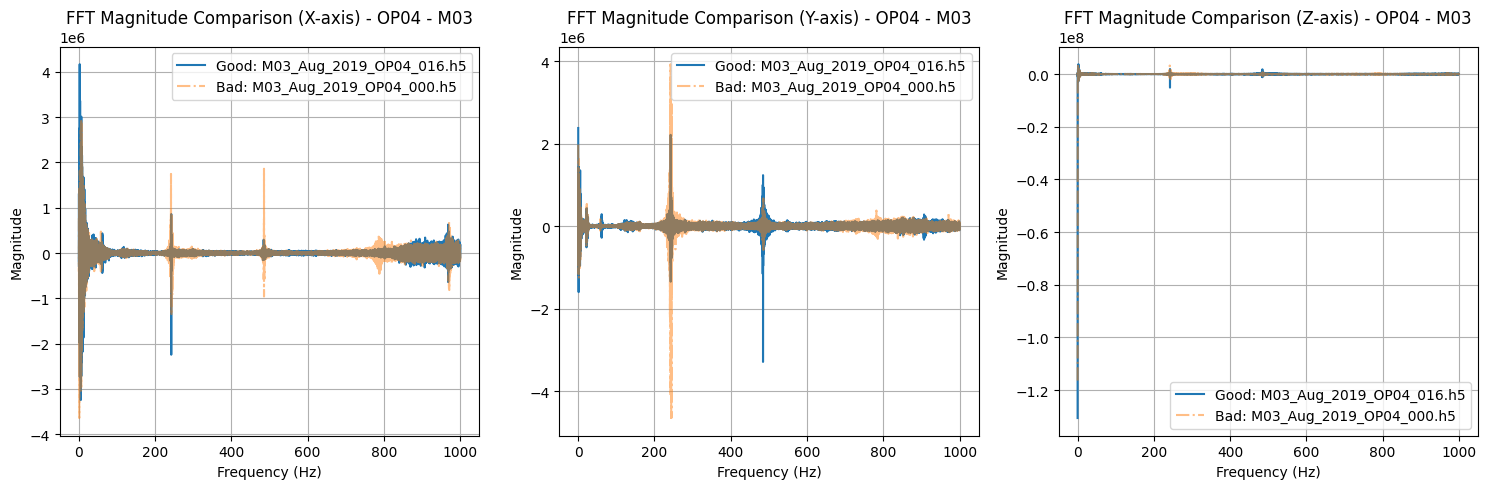

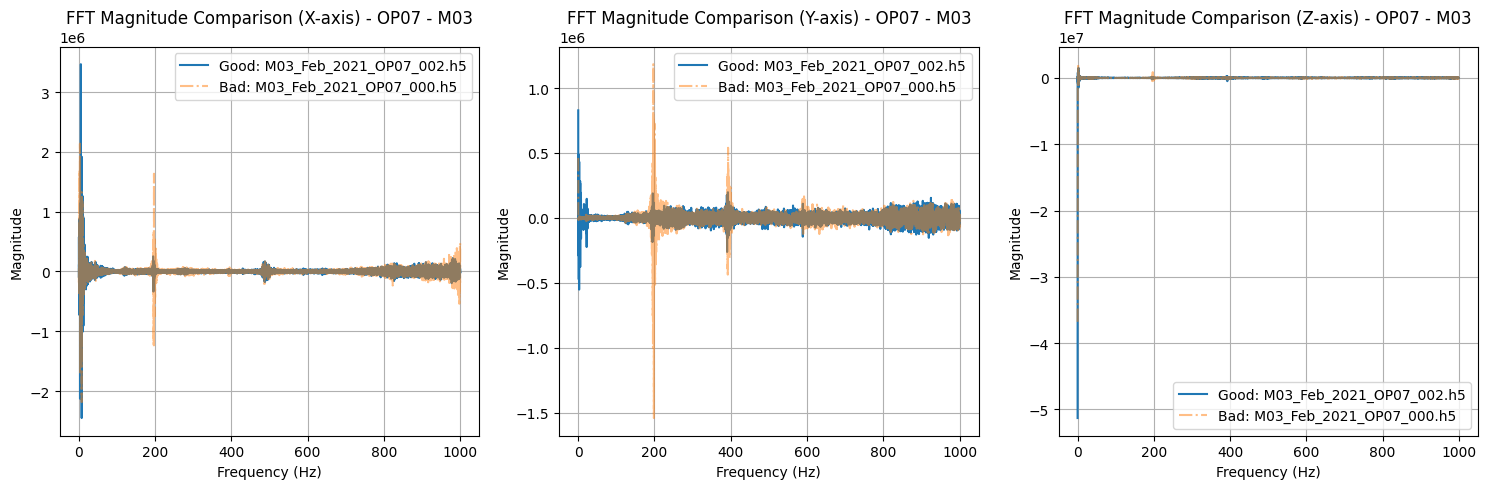

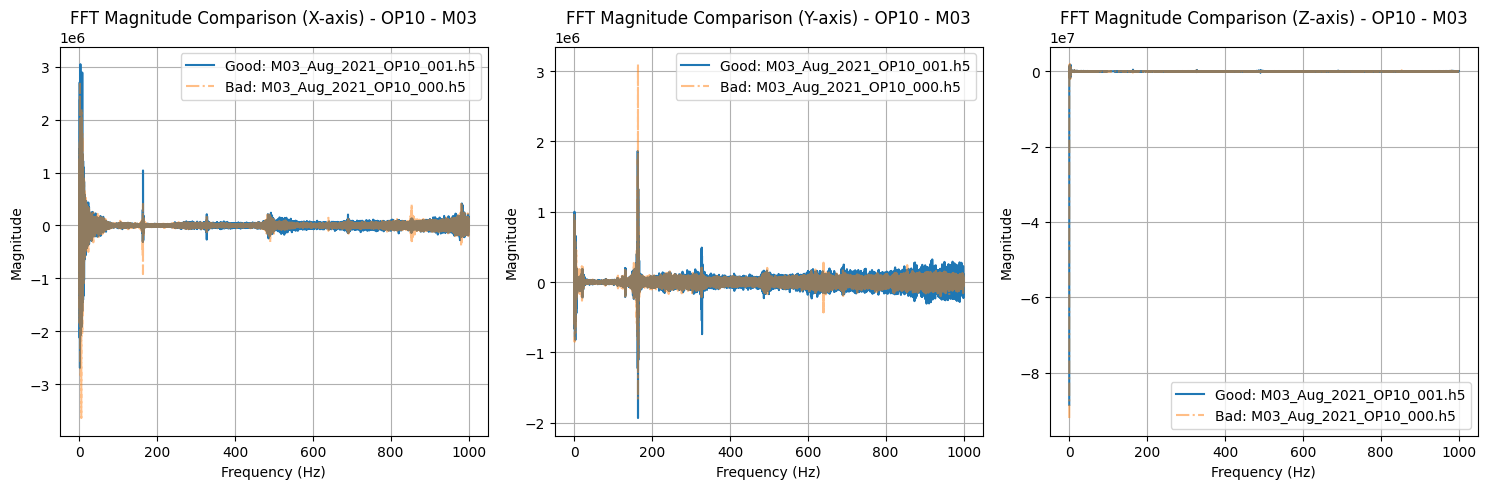

In [30]:
data_root = "./data/"
sampling_freq = 2000
# Iterate through each machine and operation
for machine in machines:
    for operation in df_sorted[df_sorted['Machine'] == machine]['Operation']:
        bad_folder = os.path.join(data_root, machine, operation, 'bad')
        # Check if there are bad samples for the current operation
        if os.path.exists(bad_folder):
            # Get the list of bad files
            bad_files = [file for file in os.listdir(bad_folder) if file.endswith('.h5')]
            # Check if there are bad files for the current operation
            if bad_files:
                # Iterate through each bad sample
                for bad_file in bad_files:
                    # Extract the year and month from the bad file name
                    bad_year_month = bad_file.split('_')[1] + '_' + bad_file.split('_')[2]
                    # Find corresponding good samples based on the year and month
                    corresponding_good_files = [file for file in os.listdir(os.path.join(data_root, machine, operation, 'good')) if file.endswith('.h5') and bad_year_month in file]
                    if corresponding_good_files:
                        # Load vibration data for bad sample
                        with h5py.File(os.path.join(bad_folder, bad_file), 'r') as bad_h5:
                            bad_data_x = bad_h5['vibration_data'][:, 0]
                            bad_data_y = bad_h5['vibration_data'][:, 1]
                            bad_data_z = bad_h5['vibration_data'][:, 2]
                        # Compute FFT for bad sample (X-axis)
                        freqs_bad_x, magnitudes_bad_x = compute_fft(bad_data_x, sampling_freq)
                        freqs_bad_y, magnitudes_bad_y = compute_fft(bad_data_y, sampling_freq)
                        freqs_bad_z, magnitudes_bad_z = compute_fft(bad_data_z, sampling_freq)
                        # Load and compute FFT for corresponding good sample
                        with h5py.File(os.path.join(data_root, machine, operation, 'good', corresponding_good_files[0]), 'r') as good_h5:
                            good_data_x = good_h5['vibration_data'][:, 0]
                            good_data_y = good_h5['vibration_data'][:, 1]
                            good_data_z = good_h5['vibration_data'][:, 2]
                        # Compute FFT for good sample (X-axis)
                        freqs_good_x, magnitudes_good_x = compute_fft(good_data_x, sampling_freq)
                        freqs_good_y, magnitudes_good_y = compute_fft(good_data_y, sampling_freq)
                        freqs_good_z, magnitudes_good_z = compute_fft(good_data_z, sampling_freq)
                        # Get the names of the good and bad sample files
                        good_sample_name = corresponding_good_files[0]
                        bad_sample_name = bad_file
                        # Plot FFT magnitudes for comparison
                        plt.figure(figsize=(15, 5))
                        plt.subplot(1, 3, 1)
                        plt.plot(freqs_good_x, magnitudes_good_x, label=f'Good: {good_sample_name}')
                        plt.plot(freqs_bad_x, magnitudes_bad_x, label=f'Bad: {bad_sample_name}', linestyle='dashdot', alpha=0.5)
                        plt.xlabel('Frequency (Hz)')
                        plt.ylabel('Magnitude')
                        plt.title(f'FFT Magnitude Comparison (X-axis) - {operation} - {machine}')
                        plt.legend()
                        plt.grid(True)
                        plt.subplot(1, 3, 2)
                        plt.plot(freqs_good_y, magnitudes_good_y, label=f'Good: {good_sample_name}')
                        plt.plot(freqs_bad_y, magnitudes_bad_y, label=f'Bad: {bad_sample_name}', linestyle='dashdot', alpha=0.5)
                        plt.xlabel('Frequency (Hz)')
                        plt.ylabel('Magnitude')
                        plt.title(f'FFT Magnitude Comparison (Y-axis) - {operation} - {machine}')
                        plt.legend()
                        plt.grid(True)
                        plt.subplot(1, 3, 3)
                        plt.plot(freqs_good_z, magnitudes_good_z, label=f'Good: {good_sample_name}')
                        plt.plot(freqs_bad_z, magnitudes_bad_z, label=f'Bad: {bad_sample_name}', linestyle='dashdot', alpha=0.5)
                        plt.xlabel('Frequency (Hz)')
                        plt.ylabel('Magnitude')
                        plt.title(f'FFT Magnitude Comparison (Z-axis) - {operation} - {machine}')
                        plt.legend()
                        plt.grid(True)
                        plt.tight_layout()
                        plt.show()
                        # Break out of the loop after plotting one set of plots for each operation and machine pair
                        break


In [31]:
def load_data(file_path):
    """Load vibration data from an HDF5 file."""
    with h5py.File(file_path, 'r') as file:
        df = file['vibration_data'][:]
    return pd.DataFrame({'X': df[:, 0], 'Y': df[:, 1], 'Z': df[:, 2]})

In [32]:
def extract_custom_features_from_file(file_path):
    """Extract custom features from a single HDF5 file."""
    with h5py.File(file_path, 'r') as file:
        # Extract the vibration data
        vibration_data = file['vibration_data'][:]
    
    # Convert vibration data to DataFrame
    vibration_df = pd.DataFrame({'X': vibration_data[:, 0], 'Y': vibration_data[:, 1], 'Z': vibration_data[:, 2]})
    
    # Add a time index (since we don't have one, we'll just use row numbers)
    vibration_df['time'] = range(len(vibration_df))
    
    # Perform imputation to handle missing values
    imputed_df = impute(vibration_df)
    
    # Extract custom features using tsfresh
    custom_features = extract_features(imputed_df, column_id='time', default_fc_parameters=MinimalFCParameters())
    
    return custom_features

# Example usage:
data_file = './data/M01/OP01/good/M01_Feb_2019_OP01_000.h5'  # Replace with the actual file path

# Extract custom features from the file
custom_features = extract_custom_features_from_file(data_file)
print(custom_features)

Feature Extraction: 100%|███████████████████████| 50/50 [00:13<00:00,  3.67it/s]


       X__sum_values  X__median  X__mean  X__length  X__standard_deviation  \
0                9.0        9.0      9.0        1.0                    0.0   
1                9.0        9.0      9.0        1.0                    0.0   
2                5.0        5.0      5.0        1.0                    0.0   
3                5.0        5.0      5.0        1.0                    0.0   
4               11.0       11.0     11.0        1.0                    0.0   
...              ...        ...      ...        ...                    ...   
58795           23.0       23.0     23.0        1.0                    0.0   
58796           11.0       11.0     11.0        1.0                    0.0   
58797           19.0       19.0     19.0        1.0                    0.0   
58798           31.0       31.0     31.0        1.0                    0.0   
58799           17.0       17.0     17.0        1.0                    0.0   

       X__variance  X__root_mean_square  X__maximum  X__absolut

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import random
import shutil
import tempfile


In [34]:
import os
import shutil
import random
from pathlib import Path

# Define a function to balance the dataset
def balance_dataset(machines, selected_operations, data_root):
    balanced_data = []
    balanced_data_dir = Path(data_root) / "balanced_data_subset"
    balanced_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{balanced_data_dir}' created")

    bad_data_dir = balanced_data_dir / "bad_data_subset"
    good_data_dir = balanced_data_dir / "good_data_subset"

    bad_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{bad_data_dir}' created")

    good_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{good_data_dir}' created")

    for machine in machines:
        for operation in selected_operations:
            bad_folder = Path(data_root) / machine / operation / 'bad'
            good_folder = Path(data_root) / machine / operation / 'good'

            # Check if there are bad samples for the current operation
            if bad_folder.exists():
                # Get the list of bad files
                bad_files = [file for file in bad_folder.iterdir() if file.is_file() and file.suffix == '.h5']
                # Check if there are bad files for the current operation
                if bad_files:
                    # Get the number of bad samples for this operation
                    num_bad_samples = len(bad_files)

                    for file in bad_files:
                        dest_bad = bad_data_dir / file.name
                        try:
                            shutil.copy2(file, dest_bad)
                            print(f"Copied '{file}' to '{dest_bad}'")
                        except shutil.Error as e:
                            print(f"Error occurred while copying file: {e}")
                        except IOError as e:
                            print(f"Error occurred while accessing file: {e.strerror}")

                        balanced_data.append((machine, operation, 'bad', file.name))

                    # Get the list of good files
                    good_files = [file for file in good_folder.iterdir() if file.is_file() and file.suffix == '.h5']
                    # Randomly select the same number of good samples as bad samples
                    random_good_files = random.sample(good_files, num_bad_samples)

                    for file in random_good_files:
                        dest_good = good_data_dir / file.name
                        try:
                            shutil.copy2(file, dest_good)
                            print(f"Copied '{file}' to '{dest_good}'")
                        except shutil.Error as e:
                            print(f"Error occurred while copying file: {e}")
                        except IOError as e:
                            print(f"Error occurred while accessing file: {e.strerror}")

                        balanced_data.append((machine, operation, 'good', file.name))

    return balanced_data


In [35]:

# Step 1: Data Preparation
selected_operations = ['OP01','OP02', 'OP04','OP07', 'OP10']
machines = ['M01', 'M02', 'M03']
data_root = Path("./data/")

balanced_data = balance_dataset(machines, selected_operations, data_root)
print(len(balanced_data), balanced_data)

Directory 'data/balanced_data_subset' created
Directory 'data/balanced_data_subset/bad_data_subset' created
Directory 'data/balanced_data_subset/good_data_subset' created
Copied 'data/M01/OP01/bad/M01_Feb_2019_OP01_000.h5' to 'data/balanced_data_subset/bad_data_subset/M01_Feb_2019_OP01_000.h5'
Copied 'data/M01/OP01/bad/M01_Aug_2019_OP01_000.h5' to 'data/balanced_data_subset/bad_data_subset/M01_Aug_2019_OP01_000.h5'
Copied 'data/M01/OP01/good/M01_Aug_2019_OP01_001.h5' to 'data/balanced_data_subset/good_data_subset/M01_Aug_2019_OP01_001.h5'
Copied 'data/M01/OP01/good/M01_Feb_2021_OP01_006.h5' to 'data/balanced_data_subset/good_data_subset/M01_Feb_2021_OP01_006.h5'
Copied 'data/M01/OP02/bad/M01_Feb_2019_OP02_000.h5' to 'data/balanced_data_subset/bad_data_subset/M01_Feb_2019_OP02_000.h5'
Copied 'data/M01/OP02/good/M01_Feb_2021_OP02_014.h5' to 'data/balanced_data_subset/good_data_subset/M01_Feb_2021_OP02_014.h5'
Copied 'data/M01/OP04/bad/M01_Aug_2019_OP04_000.h5' to 'data/balanced_data_subs

In [36]:
import os
import shutil
import random
from pathlib import Path
import h5py
import numpy as np

# Define a function to balance the dataset
def balance_dataset(machines, selected_operations, data_root):
    balanced_data = []
    balanced_data_dir = Path(data_root) / "balanced_data_new"
    balanced_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{balanced_data_dir}' created")

    bad_data_dir = balanced_data_dir / "bad_data_new"
    good_data_dir = balanced_data_dir / "good_data_new"

    bad_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{bad_data_dir}' created")

    good_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{good_data_dir}' created")

    for machine in machines:
        for operation in selected_operations:
            bad_folder = Path(data_root) / machine / operation / 'bad'
            good_folder = Path(data_root) / machine / operation / 'good'

            # Check if there are bad samples for the current operation
            if bad_folder.exists():
                # Get the list of bad files
                bad_files = [file for file in bad_folder.iterdir() if file.is_file() and file.suffix == '.h5']
                # Check if there are bad files for the current operation
                if bad_files:
                    # Get the lengths of bad samples
                    bad_lengths = []
                    for file in bad_files:
                        with h5py.File(file, 'r') as f:
                            bad_lengths.append(f['vibration_data'].shape[0])

                    sorted_bad_lengths = sorted(bad_lengths, reverse=True)

                    for file in bad_files:
                        dest_bad = bad_data_dir / file.name
                        try:
                            shutil.copy2(file, dest_bad)
                            print(f"Copied '{file}' to '{dest_bad}'")
                        except shutil.Error as e:
                            print(f"Error occurred while copying file: {e}")
                        except IOError as e:
                            print(f"Error occurred while accessing file: {e.strerror}")

                        balanced_data.append((machine, operation, 'bad', file.name))

                    # Get the list of good files
                    good_files = [file for file in good_folder.iterdir() if file.is_file() and file.suffix == '.h5']
                    # Randomly select the same number of good samples as bad samples
                    random_good_files = random.sample(good_files, len(bad_files))

                    for i, file in enumerate(random_good_files):
                        dest_good = good_data_dir / file.name
                        trim_length = sorted_bad_lengths[i]
                        try:
                            trim_good_sample(file, dest_good, trim_length)
                            print(f"Trimmed and copied '{file}' to '{dest_good}'")
                        except shutil.Error as e:
                            print(f"Error occurred while copying file: {e}")
                        except IOError as e:
                            print(f"Error occurred while accessing file: {e.strerror}")

                        balanced_data.append((machine, operation, 'good', file.name))

    return balanced_data

def trim_good_sample(src_path, dest_path, trim_length):
    with h5py.File(src_path, 'r') as file:
        vibration_data = file['vibration_data'][:]

    if vibration_data.shape[0] > trim_length:
        trimmed_data = vibration_data[:trim_length]
    else:
        trimmed_data = vibration_data

    with h5py.File(dest_path, 'w') as f:
        f.create_dataset('vibration_data', data=trimmed_data)

def trim_and_split_data(file_path, output_dir, sample_rate=2000, trim_duration=12):
    with h5py.File(file_path, 'r') as file:
        # Extract the vibration data
        vibration_data = file['vibration_data'][:]
    
    total_samples = vibration_data.shape[0]
    trim_samples = trim_duration * sample_rate

    if total_samples < trim_samples:
        print(f"File {file_path} is shorter than the trim duration and will be skipped.")
        return
    
    # Trim from both start and end to center the data
    half_trim_samples = trim_samples // 2
    start_trimmed_data = vibration_data[half_trim_samples:-half_trim_samples]

    # Split longer samples
    if total_samples > 3 * trim_samples:
        n_splits = total_samples // trim_samples
        for i in range(n_splits):
            start_idx = i * trim_samples
            end_idx = start_idx + trim_samples
            if end_idx <= total_samples:
                split_data = vibration_data[start_idx:end_idx]
                save_split_data(split_data, output_dir, file_path, i)
    else:
        save_split_data(start_trimmed_data, output_dir, file_path)

def save_split_data(data, output_dir, original_file_path, split_index=None):
    output_file_name = Path(original_file_path).stem
    if split_index is not None:
        output_file_name += f"_{split_index}"
    output_file_name += ".h5"
    output_file_path = output_dir / output_file_name
    
    with h5py.File(output_file_path, 'w') as f:
        f.create_dataset('vibration_data', data=data)
    print(f"Saved trimmed/split data to {output_file_path}")

def process_data_files(data_dir, sample_rate=2000, trim_duration=12):
    data_dir = Path(data_dir)
    balanced_data_dir = data_dir / "balanced_data_new"
    
    bad_data_dir = balanced_data_dir / "bad_data_new"
    good_data_dir = balanced_data_dir / "good_data_new"
    
    for folder in [bad_data_dir, good_data_dir]:
        for file_path in folder.glob('*.h5'):
            trim_and_split_data(file_path, folder, sample_rate, trim_duration)



In [37]:
# Step 1: Data Preparation
selected_operations = ['OP00', 'OP01', 'OP02', 'OP03', 'OP04', 'OP05', 'OP06', 'OP07', 'OP08', 'OP09', 'OP10', 'OP11', 'OP12', 'OP13', 'OP14']
machines = ['M01', 'M02', 'M03']
data_root = Path("./data/")

balanced_data = balance_dataset(machines, selected_operations, data_root)
print(len(balanced_data), balanced_data)

# Step 2: Trim and split data
process_data_files(data_root)


Directory 'data/balanced_data_new' created
Directory 'data/balanced_data_new/bad_data_new' created
Directory 'data/balanced_data_new/good_data_new' created
Copied 'data/M01/OP01/bad/M01_Feb_2019_OP01_000.h5' to 'data/balanced_data_new/bad_data_new/M01_Feb_2019_OP01_000.h5'
Copied 'data/M01/OP01/bad/M01_Aug_2019_OP01_000.h5' to 'data/balanced_data_new/bad_data_new/M01_Aug_2019_OP01_000.h5'
Trimmed and copied 'data/M01/OP01/good/M01_Feb_2021_OP01_011.h5' to 'data/balanced_data_new/good_data_new/M01_Feb_2021_OP01_011.h5'
Trimmed and copied 'data/M01/OP01/good/M01_Feb_2021_OP01_009.h5' to 'data/balanced_data_new/good_data_new/M01_Feb_2021_OP01_009.h5'
Copied 'data/M01/OP02/bad/M01_Feb_2019_OP02_000.h5' to 'data/balanced_data_new/bad_data_new/M01_Feb_2019_OP02_000.h5'
Trimmed and copied 'data/M01/OP02/good/M01_Feb_2019_OP02_003.h5' to 'data/balanced_data_new/good_data_new/M01_Feb_2019_OP02_003.h5'
Copied 'data/M01/OP03/bad/M01_Aug_2019_OP03_000.h5' to 'data/balanced_data_new/bad_data_new/M0

In [38]:
data_root = "./data/"
bad_folder = Path(data_root) / 'balanced_data_new' / 'bad_data_new'
time_bad = []
bad_files = [file for file in bad_folder.iterdir() if file.is_file() and file.suffix == '.h5']
for file in bad_files:
    with h5py.File(file, 'r') as file:
    # Extract the vibration data
        vibration_data = file['vibration_data'][:]
        time = len(vibration_data)/2000
        # Display the first few rows of the DataFrame
        time_bad.append(time)
        print(time)

12.0
12.0
12.0
62.3655
45.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
17.592
12.0
12.0
12.0
12.0
41.7205
53.7755
12.0
0.0
12.0
12.0
12.0
2.8105
0.0
12.0
5.4505
20.1155
6.0
12.0
12.0
12.0
12.0
0.0
12.0
12.0
12.0
12.0
42.7055
20.2955
11.5405
12.0
12.0
12.0
12.0
2.9155
19.9055
12.0
12.0
12.0
0.0
12.0
0.0
10.0
42.7955
12.0
12.0
52.1655
12.0
12.0
12.0
12.0
11.4055
85.078
12.0
11.2555
0.0
12.0
12.0
12.0
12.0
43.0105
14.3055
0.0
12.0
12.0
12.0
12.0
0.0
53.5805
0.0
12.0
12.0
20.0905
23.8555
42.4105
12.0
12.0
40.0
12.0
12.0
0.0
0.0
12.0
12.0
12.0
12.0
88.0
42.6855
12.0
12.0
11.0
12.0
80.0
12.0
57.003
51.8905
0.0
0.0
0.0
0.0
2.736
12.0
12.0
0.0
12.0
12.0
9.6805
75.0
12.0
12.0
0.0
9.0
0.0
0.0
0.0
0.0
42.8205
0.0
12.0
0.0
12.0
0.0
12.0
12.0
12.0
42.6155
12.0
0.0
20.0355
3.0
12.0
8.0
12.0
0.0
12.0
12.0
0.0
12.0
62.8755
12.0
45.0
0.0
7.4915
21.865
0.0
0.0
12.0
12.0
5.2235
23.0
3.0955
24.0
12.0
0.0
12.0
0.0
42.5705
0.0
0.0
59.595
0.0
53.5755
14.5805
0.0
0.0
12.0
90.0
0.0
69.8265
12.

In [39]:
data_root = "./data/"
good_folder = Path(data_root) / 'balanced_data_new' / 'good_data_new'

good_files = [file for file in good_folder.iterdir() if file.is_file() and file.suffix == '.h5']
time_good= []
for file in good_files:
    with h5py.File(file, 'r') as file:
    # Extract the vibration data
        vibration_data = file['vibration_data'][:]
        time = len(vibration_data)/2000
        # Display the first few rows of the DataFrame
        time_good.append(time)
        print(time)

12.0
20.0355
12.0
12.0
75.0
12.0
12.0
23.0
43.52
12.0
12.0
12.0
12.0
80.0
12.0
0.0
20.2955
0.0
12.0
12.0
12.0
0.0
12.0
40.0
12.0
12.0
9.0
12.0
6.8355
12.0
12.0
96.953
11.5405
12.0
12.0
8.0
36.1905
12.0
62.3905
12.0
12.0
12.0
90.0
0.0
9.0
12.0
0.0
12.0
12.0
12.0
85.078
12.0
12.0
12.0
2.736
12.0
12.0
42.7955
12.0
12.0
12.0
5.592
12.0
12.0
2.3055
14.3055
12.0
12.0
2.8105
53.5805
37.8705
12.0
12.0
0.0
12.0
12.0
42.6155
11.0
2.5205
88.0
130.0
12.0
12.0
12.0
2.8105
5.4505
12.0
12.0
12.0
12.0
10.0
0.0
12.0
12.0
12.0
6.0
52.1655
12.0
12.0
0.0
12.0
8.0355
2.5805
12.0
12.0
12.0
12.0
12.0
37.8705
12.0
14.5805
12.0
96.953
12.0
36.1905
12.0
12.0
12.0
42.7955
12.0
0.0
12.0
2.9155
12.0
8.0
41.7205
0.0
1.3965
12.0
0.0
12.0
12.0
130.0
12.0
12.0
12.0
11.5405
69.8265
42.5705
62.3655
12.0
12.0
12.0
12.0
3.0
12.0
0.0
0.0
20.1155
12.0
12.0
12.0
0.0
12.0
0.0
0.0
0.0
12.0
12.0
12.0
11.4055
40.0
3.0955
0.0
12.0
12.0
41.7205
3.0205
12.0
12.0
0.0
0.0
12.0
12.0
62.8755
12.0
0.0
12.0
12.0
12.0
57.003
12.0
59.595
5

In [40]:
import os
import shutil
import random
from pathlib import Path
import h5py
import numpy as np

# Define a function to balance the dataset
def balance_dataset(machines, selected_operations, data_root):
    balanced_data = []
    balanced_data_dir = Path(data_root) / "balanced_data_tr"
    balanced_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{balanced_data_dir}' created")

    bad_data_dir = balanced_data_dir / "bad_data_tr"
    good_data_dir = balanced_data_dir / "good_data_tr"

    bad_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{bad_data_dir}' created")

    good_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{good_data_dir}' created")

    for machine in machines:
        for operation in selected_operations:
            bad_folder = Path(data_root) / machine / operation / 'bad'
            good_folder = Path(data_root) / machine / operation / 'good'

            # Check if there are bad samples for the current operation
            if bad_folder.exists():
                # Get the list of bad files
                bad_files = [file for file in bad_folder.iterdir() if file.is_file() and file.suffix == '.h5']
                # Check if there are bad files for the current operation
                if bad_files:
                    # Get the lengths of bad samples
                    bad_lengths = []
                    for file in bad_files:
                        with h5py.File(file, 'r') as f:
                            bad_lengths.append(f['vibration_data'].shape[0])

                    sorted_bad_lengths = sorted(bad_lengths, reverse=True)

                    for file in bad_files:
                        dest_bad = bad_data_dir / file.name
                        try:
                            shutil.copy2(file, dest_bad)
                            print(f"Copied '{file}' to '{dest_bad}'")
                        except shutil.Error as e:
                            print(f"Error occurred while copying file: {e}")
                        except IOError as e:
                            print(f"Error occurred while accessing file: {e.strerror}")

                        balanced_data.append((machine, operation, 'bad', file.name))

                    # Get the list of good files
                    good_files = [file for file in good_folder.iterdir() if file.is_file() and file.suffix == '.h5']
                    # Randomly select the same number of good samples as bad samples
                    random_good_files = random.sample(good_files, len(bad_files))

                    for i, file in enumerate(random_good_files):
                        dest_good = good_data_dir / file.name
                        trim_length = sorted_bad_lengths[i]
                        try:
                            trim_good_sample(file, dest_good, trim_length)
                            print(f"Trimmed and copied '{file}' to '{dest_good}'")
                        except shutil.Error as e:
                            print(f"Error occurred while copying file: {e}")
                        except IOError as e:
                            print(f"Error occurred while accessing file: {e.strerror}")

                        balanced_data.append((machine, operation, 'good', file.name))

    return balanced_data

def trim_good_sample(src_path, dest_path, trim_length):
    with h5py.File(src_path, 'r') as file:
        vibration_data = file['vibration_data'][:]

    if vibration_data.shape[0] > trim_length:
        trimmed_data = vibration_data[:trim_length]
    else:
        trimmed_data = vibration_data

    with h5py.File(dest_path, 'w') as f:
        f.create_dataset('vibration_data', data=trimmed_data)

def trim_and_split_data(file_path, output_dir, sample_rate=2000, trim_duration=12):
    with h5py.File(file_path, 'r') as file:
        # Extract the vibration data
        vibration_data = file['vibration_data'][:]
    
    total_samples = vibration_data.shape[0]
    trim_samples = trim_duration * sample_rate

    if total_samples < trim_samples:
        print(f"File {file_path} is shorter than the trim duration and will be skipped.")
        return
    
    # Trim from both start and end to center the data
    half_trim_samples = trim_samples // 2
    start_trimmed_data = vibration_data[half_trim_samples:-half_trim_samples]

    # Split longer samples
    if total_samples > 3 * trim_samples:
        n_splits = total_samples // trim_samples
        for i in range(n_splits):
            start_idx = i * trim_samples
            end_idx = start_idx + trim_samples
            if end_idx <= total_samples:
                split_data = vibration_data[start_idx:end_idx]
                save_split_data(split_data, output_dir, file_path, i)
    else:
        save_split_data(start_trimmed_data, output_dir, file_path)

def save_split_data(data, output_dir, original_file_path, split_index=None):
    output_file_name = Path(original_file_path).stem
    if split_index is not None:
        output_file_name += f"_{split_index}"
    output_file_name += ".h5"
    output_file_path = output_dir / output_file_name
    
    with h5py.File(output_file_path, 'w') as f:
        f.create_dataset('vibration_data', data=data)
    print(f"Saved trimmed/split data to {output_file_path}")

def process_data_files(data_dir, sample_rate=2000, trim_duration=12):
    data_dir = Path(data_dir)
    balanced_data_dir = data_dir / "balanced_data_tr"
    
    bad_data_dir = balanced_data_dir / "bad_data_tr"
    good_data_dir = balanced_data_dir / "good_data_tr"
    
    for folder in [bad_data_dir, good_data_dir]:
        for file_path in folder.glob('*.h5'):
            trim_and_split_data(file_path, folder, sample_rate, trim_duration)

# Step 1: Data Preparation
selected_operations = ['OP00', 'OP01', 'OP02', 'OP03', 'OP04', 'OP05', 'OP06', 'OP07', 'OP08', 'OP09', 'OP10', 'OP11', 'OP12', 'OP13', 'OP14']
machines = ['M01', 'M02', 'M03']
data_root = Path("./data/")

balanced_data = balance_dataset(machines, selected_operations, data_root)
print(len(balanced_data), balanced_data)

# Step 2: Trim and split data
process_data_files(data_root)


Directory 'data/balanced_data_tr' created
Directory 'data/balanced_data_tr/bad_data_tr' created
Directory 'data/balanced_data_tr/good_data_tr' created
Copied 'data/M01/OP01/bad/M01_Feb_2019_OP01_000.h5' to 'data/balanced_data_tr/bad_data_tr/M01_Feb_2019_OP01_000.h5'
Copied 'data/M01/OP01/bad/M01_Aug_2019_OP01_000.h5' to 'data/balanced_data_tr/bad_data_tr/M01_Aug_2019_OP01_000.h5'
Trimmed and copied 'data/M01/OP01/good/M01_Feb_2021_OP01_003.h5' to 'data/balanced_data_tr/good_data_tr/M01_Feb_2021_OP01_003.h5'
Trimmed and copied 'data/M01/OP01/good/M01_Feb_2021_OP01_005.h5' to 'data/balanced_data_tr/good_data_tr/M01_Feb_2021_OP01_005.h5'
Copied 'data/M01/OP02/bad/M01_Feb_2019_OP02_000.h5' to 'data/balanced_data_tr/bad_data_tr/M01_Feb_2019_OP02_000.h5'
Trimmed and copied 'data/M01/OP02/good/M01_Aug_2021_OP02_000.h5' to 'data/balanced_data_tr/good_data_tr/M01_Aug_2021_OP02_000.h5'
Copied 'data/M01/OP03/bad/M01_Aug_2019_OP03_000.h5' to 'data/balanced_data_tr/bad_data_tr/M01_Aug_2019_OP03_000

In [41]:
data_root = "./data/"
good_folder = Path(data_root) / 'balanced_data_tr2' / 'bad_data_tr2'

good_files = [file for file in good_folder.iterdir() if file.is_file() and file.suffix == '.h5']
time_good= []
for file in good_files:
    with h5py.File(file, 'r') as file:
    # Extract the vibration data
        vibration_data = file['vibration_data'][:]
        time = len(vibration_data)/2000
        # Display the first few rows of the DataFrame
        time_good.append(time)
        print(time)

12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0


In [42]:
import os
import shutil
import random
from pathlib import Path
import h5py
import pandas as pd

def trim_and_save_vibration_data(src_file, dest_dir, target_length, prefix):
    with h5py.File(src_file, 'r') as file:
        vibration_data = file['vibration_data'][:]
        
    # Calculate the number of samples for the target length
    num_samples = int(target_length * 2000)  # 2000 Hz sampling rate
    
    # Trim the data
    if len(vibration_data) > num_samples:
        trimmed_data = vibration_data[-num_samples:]
    else:
        trimmed_data = vibration_data

    # Segment the trimmed data into 12-second chunks
    num_segments = len(trimmed_data) // (12 * 2000)
    for i in range(num_segments):
        segment = trimmed_data[i * 12 * 2000 : (i + 1) * 12 * 2000]
        segment_file_name = f"{prefix}_{i}.h5"
        segment_file_path = dest_dir / segment_file_name
        with h5py.File(segment_file_path, 'w') as segment_file:
            segment_file.create_dataset('vibration_data', data=segment)
        print(f"Saved trimmed segment '{segment_file_path}'")

def balance_dataset(machines, selected_operations, data_root):
    balanced_data = []
    balanced_data_dir = Path(data_root) / "balanced_data_tr2"
    balanced_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{balanced_data_dir}' created")

    bad_data_dir = balanced_data_dir / "bad_data_tr2"
    good_data_dir = balanced_data_dir / "good_data_tr2"

    bad_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{bad_data_dir}' created")

    good_data_dir.mkdir(exist_ok=True)
    print(f"Directory '{good_data_dir}' created")

    for machine in machines:
        for operation in selected_operations:
            bad_folder = Path(data_root) / machine / operation / 'bad'
            good_folder = Path(data_root) / machine / operation / 'good'

            # Check if there are bad samples for the current operation
            if bad_folder.exists():
                # Get the list of bad files
                bad_files = [file for file in bad_folder.iterdir() if file.is_file() and file.suffix == '.h5']
                # Check if there are bad files for the current operation
                if bad_files:
                    # Get the number of bad samples for this operation
                    num_bad_samples = len(bad_files)

                    # Get the lengths of all bad samples
                    bad_lengths = []
                    for file in bad_files:
                        with h5py.File(file, 'r') as h5file:
                            vibration_data = h5file['vibration_data'][:]
                            length_sec = len(vibration_data) / 2000
                            bad_lengths.append(length_sec)
                    
                    bad_lengths.sort(reverse=True)

                    for idx, file in enumerate(bad_files):
                        dest_bad = bad_data_dir / f"{file.stem}_trimmed.h5"
                        trim_and_save_vibration_data(file, bad_data_dir, bad_lengths[idx], f"{file.stem}_bad")

                    # Get the list of good files
                    good_files = [file for file in good_folder.iterdir() if file.is_file() and file.suffix == '.h5']
                    # Randomly select the same number of good samples as bad samples
                    random_good_files = random.sample(good_files, num_bad_samples)

                    # Get the lengths of all selected good samples
                    good_lengths = []
                    for file in random_good_files:
                        with h5py.File(file, 'r') as h5file:
                            vibration_data = h5file['vibration_data'][:]
                            length_sec = len(vibration_data) / 2000
                            good_lengths.append(length_sec)
                    
                    good_lengths.sort(reverse=True)

                    for idx, file in enumerate(random_good_files):
                        target_length = min(bad_lengths[idx], good_lengths[idx])
                        dest_good = good_data_dir / f"{file.stem}_trimmed.h5"
                        trim_and_save_vibration_data(file, good_data_dir, target_length, f"{file.stem}_good")

    return balanced_data

# Step 1: Data Preparation
selected_operations = ['OP00', 'OP01', 'OP02', 'OP03', 'OP04', 'OP05', 'OP06', 'OP07', 'OP08', 'OP09', 'OP10', 'OP11', 'OP12', 'OP13', 'OP14']
machines = ['M01', 'M02', 'M03']
data_root = Path("./data/")

balanced_data = balance_dataset(machines, selected_operations, data_root)
print(len(balanced_data), balanced_data)


Directory 'data/balanced_data_tr2' created
Directory 'data/balanced_data_tr2/bad_data_tr2' created
Directory 'data/balanced_data_tr2/good_data_tr2' created
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Feb_2019_OP01_000_bad_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Aug_2019_OP01_000_bad_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/good_data_tr2/M01_Aug_2019_OP01_009_good_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/good_data_tr2/M01_Feb_2021_OP01_007_good_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Feb_2019_OP02_000_bad_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Feb_2019_OP02_000_bad_1.h5'
Saved trimmed segment 'data/balanced_data_tr2/good_data_tr2/M01_Aug_2019_OP02_010_good_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/good_data_tr2/M01_Aug_2019_OP02_010_good_1.h5'
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Aug_2019_OP03_000_bad_0.h5'
Saved trimmed seg

In [43]:


# Function to load vibration data from a single file
def load_vibration_data(file_path):
    with h5py.File(file_path, 'r') as file:
        # Extract the vibration data
        vibration_data = file['vibration_data'][:]
    # Convert vibration data to DataFrame
    vibration_df = pd.DataFrame({'X': vibration_data[:, 0], 'Y': vibration_data[:, 1], 'Z': vibration_data[:, 2]})
    return vibration_df

def load_dataset(balanced_data, data_root, max_sequence_length):
    X = []  # Features (vibration data)
    y = []  # Labels (good or bad)
    
    for machine, operation, label, file_name in balanced_data:
        file_path = os.path.join(data_root, machine, operation, label, file_name)
        vibration_df = load_vibration_data(file_path)
        # Pad or truncate the sequences to a fixed length
        if len(vibration_df) < max_sequence_length:
            # Pad sequence with zeros
            padded_sequence = np.pad(vibration_df.values, ((0, max_sequence_length - len(vibration_df)), (0, 0)), mode='constant')
        else:
            # Truncate sequence
            padded_sequence = vibration_df.values[:max_sequence_length, :]
        # Flatten the padded sequence into a 1D vector
        flattened_sequence = padded_sequence.flatten()
        X.append(flattened_sequence)
        y.append(label)
    
    return np.array(X), np.array(y)

# Step 1: Data Preparation
selected_operations = ['OP01', 'OP02', 'OP04', 'OP07', 'OP10']
machines = ['M01', 'M02', 'M03']
data_root = "./data/"
max_sequence_length = 1000  # Define the maximum sequence length

balanced_data = balance_dataset(machines, selected_operations, data_root)

# Step 2: Load and Prepare the Dataset with Padding/Truncation
X, y = load_dataset(balanced_data, data_root, max_sequence_length)

# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Model Training
max_features = None  # You can set it to a specific value if desired
n_estimators = 100  # Number of trees in the forest
max_depth = None  # Maximum depth of the tree
min_samples_leaf = 1  # Minimum number of samples required to be at a leaf node
min_samples_split = 2  # Minimum number of samples required to split an internal node

model = RandomForestClassifier(
    max_features=max_features,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    min_samples_split=min_samples_split,
    random_state=37
)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)

Directory 'data/balanced_data_tr2' created
Directory 'data/balanced_data_tr2/bad_data_tr2' created
Directory 'data/balanced_data_tr2/good_data_tr2' created
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Feb_2019_OP01_000_bad_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Aug_2019_OP01_000_bad_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/good_data_tr2/M01_Feb_2019_OP01_003_good_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/good_data_tr2/M01_Feb_2021_OP01_009_good_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Feb_2019_OP02_000_bad_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Feb_2019_OP02_000_bad_1.h5'
Saved trimmed segment 'data/balanced_data_tr2/good_data_tr2/M01_Feb_2019_OP02_000_good_0.h5'
Saved trimmed segment 'data/balanced_data_tr2/good_data_tr2/M01_Feb_2019_OP02_000_good_1.h5'
Saved trimmed segment 'data/balanced_data_tr2/bad_data_tr2/M01_Aug_2019_OP04_000_bad_0.h5'
Saved trimmed seg

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 6: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='bad')  # or 'good' depending on your class labels
recall = recall_score(y_test, y_pred, pos_label='bad')  # or 'good' depending on your class labels
f1 = f1_score(y_test, y_pred, pos_label='bad')  # or 'good' depending on your class labels
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


NameError: name 'y_test' is not defined

In [45]:
import numpy as np
from scipy.fft import fft
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

def compute_fft_features(vibration_data, sampling_freq, freq_bins):
    # Compute FFT
    fft_result = np.fft.fft(vibration_data)
    freqs = np.fft.fftfreq(len(vibration_data), 1 / sampling_freq)
    
    # Initialize lists to store feature values
    fft_features = []
    
    # Compute features for each frequency bin
    for freq_range in freq_bins:
        start_freq, end_freq = freq_range
        mask = (freqs >= start_freq) & (freqs < end_freq)
        freq_subset = freqs[mask]
        magnitude_subset = np.abs(fft_result[mask])
        
        # Check if the subset is empty
        if len(freq_subset) == 0:
            # Skip this frequency bin
            continue
        
        # Compute features for this frequency bin
        mean_magnitude = np.mean(magnitude_subset)
        max_magnitude = np.max(magnitude_subset)
        min_magnitude = np.min(magnitude_subset)
        std_magnitude = np.std(magnitude_subset)
        
        fft_features.extend([mean_magnitude, max_magnitude, min_magnitude, std_magnitude])
    
    return fft_features




def normalize_features(features):
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(features)
    return normalized_features

def select_features(X, y, k):
    selector = SelectKBest(score_func=f_classif, k=k)
    selected_features = selector.fit_transform(X, y)
    return selected_features

# Example usage:
vibration_data = load_vibration_data('./data/M01/OP01/good/M01_Feb_2019_OP01_000.h5')  # Example vibration data
sampling_freq = 2000  # Example sampling frequency
freq_bins_x = [(0, 10000), (10000, 50000), (50000, 100000), (100000, 500000),(500000,1000000), (1000000, 5000000)]
freq_bins_y = [(0, 10000), (10000, 50000), (50000, 100000), (100000, 500000),(500000,1000000), (1000000, 5000000)]
freq_bins_z = [(0, 50000), (50000, 100000), (100000, 500000), (500000, 1000000),(1000000,5000000), (5000000, 10000000), (10000000,100000000)]

# Compute FFT features for each axis separately
fft_features_x = compute_fft_features(vibration_data['X'].values, sampling_freq, freq_bins_x)
fft_features_y = compute_fft_features(vibration_data['Y'].values, sampling_freq, freq_bins_y)
fft_features_z = compute_fft_features(vibration_data['Z'].values, sampling_freq, freq_bins_z)

# Stack the features vertically
all_fft_features = np.vstack([fft_features_x, fft_features_y, fft_features_z])


In [46]:
all_fft_features

array([[3.08094564e+04, 3.51696028e+06, 1.10737259e+02, 9.80850496e+04],
       [1.86621078e+04, 2.01639964e+06, 4.71908793e+01, 3.03670018e+04],
       [1.65854340e+04, 6.10108130e+07, 5.04511987e+01, 3.57683767e+05]])

In [47]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from scipy.stats import skew

# Function to compute FFT and extract features for each axis
def compute_fft_features(file_path, max_length=100):
    with h5py.File(file_path, 'r') as file:
        vibration_data = file['vibration_data'][:]
    features = []
    for axis_data in vibration_data.T:  # Transpose to iterate over each axis
        fft_result = np.fft.fft(axis_data)
        magnitudes = np.abs(fft_result)
        centroid = np.sum(np.arange(len(magnitudes)) * magnitudes) / np.sum(magnitudes)
        spread = np.sqrt(np.sum(((np.arange(len(magnitudes)) - centroid) ** 2) * magnitudes) / np.sum(magnitudes))
        skewness = skew(magnitudes)
        axis_features = np.concatenate([magnitudes, [centroid, spread, skewness]])
        # Truncate or pad the features to a fixed length
        if len(axis_features) < max_length:
            axis_features = np.pad(axis_features, (0, max_length - len(axis_features)))
        else:
            axis_features = axis_features[:max_length]
        features.append(axis_features)
    return np.concatenate(features)

# Load the dataset
balanced_data = balanced_data  # Your list of balanced samples]

# Extract features and labels
X = []
y = []
for machine, operation, label, file_name in balanced_data:
    file_path = os.path.join(data_root, machine, operation, label, file_name)
    fft_features = compute_fft_features(file_path)
    X.append(fft_features)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RF classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

# Initialize and train MLP classifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
print("Multi-Layer Perceptron Classifier:")
print(classification_report(y_test, mlp_predictions))

# Initialize and train SVC classifier
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_test)
print("Support Vector Classifier:")
print(classification_report(y_test, svc_predictions))




ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [48]:
from sklearn.preprocessing import LabelEncoder

# Reshape the input data to have a shape suitable for CNNs
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


NameError: name 'X_train' is not defined

In [49]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test_encoded))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_encoded)
print('Test accuracy:', test_acc)


NameError: name 'model' is not defined

In [50]:
import os
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

def load_vibration_data(file_path):
    """Load raw vibration data from an HDF5 file."""
    with h5py.File(file_path, 'r') as file:
        vibration_data = file['vibration_data'][:]
    return vibration_data

def load_balanced_data(balanced_data, data_root):
    """Load balanced raw vibration data and labels."""
    X = []
    y = []
    for machine, operation, label, file_name in balanced_data:
        file_path = os.path.join(data_root, machine, operation, label, file_name)
        vibration_data = load_vibration_data(file_path)
        X.append(vibration_data)
        y.append(label)
    return np.array(X), np.array(y)


2024-08-30 13:26:25.578910: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-30 13:26:25.688484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-30 13:26:25.729048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-30 13:26:25.740500: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-30 13:26:25.803756: I tensorflow/core/platform/cpu_feature_guar

In [51]:
X_raw = []
y_raw = []
max_length = 50000  # Choose a maximum length for your samples

for machine, operation, label, file_name in balanced_data:
    file_path = os.path.join(data_root, machine, operation, label, file_name)
    
    with h5py.File(file_path, 'r') as file:
        # Extract the vibration data
        vibration_data = file['vibration_data'][:]
        # Extract X, Y, Z columns
        X = vibration_data[:, 0]
        Y = vibration_data[:, 1]
        Z = vibration_data[:, 2]
        # Concatenate X, Y, Z into a single array
        combined_data = np.column_stack((X, Y, Z))
        
        # Pad or truncate the sample to the maximum length
        if len(combined_data) < max_length:
            # Pad the sample with zeros to the maximum length
            padded_data = np.pad(combined_data, ((0, max_length - len(combined_data)), (0, 0)), mode='constant')
        else:
            # Truncate the sample to the maximum length
            padded_data = combined_data[:max_length, :]
    
        X_raw.append(padded_data)
        y_raw.append(label)

X_raw = np.array(X_raw)
y_raw = np.array(y_raw)



In [52]:
# Load balanced data

# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [53]:
print("X_raw shape:", X_raw.shape)
print("y_raw shape:", y_raw.shape)


X_raw shape: (0,)
y_raw shape: (0,)


In [54]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    """Train and evaluate the model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def train_and_evaluate_cnn(X_train, y_train, X_test, y_test):
    """Train and evaluate the CNN model."""
    model = models.Sequential([
        layers.Conv1D(32, 3, activation='relu', input_shape=X_train.shape[1:]),
        layers.MaxPooling1D(2),
        layers.Conv1D(64, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    _, accuracy = model.evaluate(X_test, y_test)
    return accuracy


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# Flatten the input data for RandomForestClassifier
X_train_flat = X_train_raw.reshape(len(X_train_raw), -1)
X_test_flat = X_test_raw.reshape(len(X_test_raw), -1)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the Random Forest classifier
rf_model.fit(X_train_flat, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test_flat)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)
from sklearn.svm import SVC

# Initialize the SVC classifier
svc_model = SVC()

# Train the SVC classifier
svc_model.fit(X_train_flat, y_train)

# Make predictions on the testing set
y_pred_svc = svc_model.predict(X_test_flat)

# Calculate the accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier Accuracy:", accuracy_svc)
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp_model = MLPClassifier()

# Train the MLP classifier
mlp_model.fit(X_train_flat, y_train)

# Make predictions on the testing set
y_pred_mlp = mlp_model.predict(X_test_flat)

# Calculate the accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Multi-Layer Perceptron Accuracy:", accuracy_mlp)
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Convert input data to float32
X_train_cnn = np.array(X_train_raw).astype('float32')
X_test_cnn = np.array(X_test_raw).astype('float32')

# Normalize input data (optional but recommended for neural networks)
X_train_cnn /= 255.0
X_test_cnn /= 255.0

# Define the CNN model architecture
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(50000, 3)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_raw, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the CNN model
test_loss, test_acc = cnn_model.evaluate(X_test_raw, y_test)
print("CNN Test Accuracy:", test_acc)



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [56]:
import numpy as np
from scipy.fft import rfft, rfftfreq

def extract_raw_features(df):
    """Calculates features directly from the raw vibration data (X, Y, Z)"""
    features = {
        'x_mean': df['X'].mean(),
        'y_mean': df['Y'].mean(),
        'z_mean': df['Z'].mean(),
        'x_std': df['X'].std(),
        # ... more features like variance, skewness, kurtosis, etc.  
    }
    return features

def extract_features_from_file(data_path, sampling_freq=2000, freq_bins=[(0, 100), (100, 200)]):  
    # ... (Your code for loading data)

    raw_features = extract_raw_features(vibration_df)

    # Calculate FFT features for each axis
    for axis in ['X', 'Y', 'Z']: 
        fft_features = compute_fft_features(data_path) 
        all_features.update(dict(zip(['{}_fft_feature_{}'.format(axis, i) for i in range(len(fft_features))], fft_features))) 

    return all_features


In [57]:
feature_dict = {} 
all_features = {}
for machine, operation, label, file in balanced_data:
    data_path = os.path.join(data_root, machine, operation, label, file)
    all_features = extract_features_from_file(data_path) 
    all_features['machine'] = machine
    all_features['operation'] = operation
    all_features['label'] = label
    feature_dict[file] = all_features 



In [58]:
feature_dict

{}